# Analyze stage

### Questions to complete the analyze stage and perform EDA
*   What kind of relationships are in the dataset between variables?
*   What kind of distributions of columns in the dataset?
*   What kind of data transformation needs to be done to develop a more accurate predictive model?
*   What are some purposes of EDA before constructing a predictive model?

Let's import packeges and load dataset.

In [ ]:
 # Import packages
import re

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
def create_correlation_matrix(data, fig_size=(10,5), masked=True):
  # Create a heatmap to visualize how correlated variables are
  corr = data.corr(numeric_only=True)

  # Set up the matplotlib plot configuration
  f, ax = plt.subplots(figsize=fig_size)

  # Generate a mask for upper traingle
  mask = np.triu(np.ones_like(corr, dtype=bool))

  # Configure a custom diverging colormap
  cmap = sns.diverging_palette(230, 20, as_cmap=True)

  # Draw the heatmap
  if masked:
    sns.heatmap(corr, annot=True, mask=mask, cmap=cmap)
  else:
    sns.heatmap(corr, annot=True, cmap=cmap)

  # displaying the plotted heatmap
  plt.show()

In [ ]:
df = pd.read_csv('drive/MyDrive/Career/Data Analysis/000_Projects/002_Global_Market/usa_glob_market.csv')

In [ ]:
df.head()

,Unnamed: 0,Company,Sector,Industry,Country,Market_Cap,Price,Change_p,Volume,Price_to_Sales,Price_to_Book,Price_to_Cash,Sales_Past_5_Years_p,Dividend_p,Return_on_Assets_p,Return_on_Equity_p,Return_on_Investment_p,Current_Ratio,Long_Term_Debt_to_Equity,Debt_to_Equity,Operating_Margin_p,Outstanding_Shares,Float,Float_Short_p,Short_Ratio,Average_Volume,Performance_Week_p,Performance_Month_p,Performance_Quarter_p,Performance_Half_Year_p,Performance_Year_p,Performance_Year_to_Date_p,Volatility_Week_p,Volatility_Month_p,Relative_Volume,Beta,Average_True_Range,Simple_Moving_Average_20_p,Simple_Moving_Average_50_p,Simple_Moving_Average_200_p,Yearly_High_p,Yearly_Low_p,Relative_Strength_Index,Change_from_Open_p,Gap_p,Insider_Ownership_Categ,Insider_Transactions_Categ
0,0,Agilent Technologies Inc.,Healthcare,Diagnostics & Research,USA,37840000000.00,129.45,1.81,367712.00,5.53,6.46,23.80,7.00,0.73,11.65,22.24,14.45,2.61,0.47,0.47,23.85,292120000.00,291330000.00,1.97,2.69,2130000.00,0.07,19.70,14.36,8.80,-17.48,-13.82,1.86,1.95,0.89,1.12,2.74,6.04,13.36,4.89,-19.53,33.23,69.70,1.06,0.33,0_25,-1_0
1,1,Alcoa Corp,Basic Materials,Aluminum,USA,4450000000.00,24.99,-0.40,1171185.00,0.41,0.99,4.18,3.40,1.34,-6.08,-17.71,-13.85,1.66,0.40,0.40,-0.65,176970000.00,176720000.00,6.69,2.14,5520000.00,-7.01,1.42,-11.60,-28.75,-47.27,-45.17,3.90,3.38,0.78,2.43,1.00,-4.23,-4.21,-25.24,-56.73,8.06,42.06,0.73,-1.08,0_25,no_data
2,4,ATA Creativity Global ADR,Consumer Defensive,Education & Training Services,China,28860000.00,0.88,9.88,4255.00,0.92,1.97,3.13,1378.42,0.00,-8.84,-33.96,-35.81,0.22,0.13,0.29,-21.46,26073943.04,8840000.00,0.05,0.80,4990.00,1.25,6.00,-22.33,-28.49,-40.89,-29.24,10.09,9.22,1.43,1.09,0.09,1.54,-7.80,-35.57,-63.81,12.63,48.99,6.00,4.94,no_data,no_data
3,5,Armada Acquisition Corp I,Financial,Shell Companies,USA,87400000.00,10.83,0.19,11.00,0.01,5.13,1439.15,0.00,0.00,-0.36,-0.39,-1.90,0.01,0.00,0.15,0.00,8070000.00,2440000.00,0.02,0.04,12080.00,0.65,0.94,3.65,2.18,9.77,6.62,0.21,0.26,0.05,0.00,0.05,0.56,1.01,5.21,-11.56,26.05,57.62,-0.37,0.19,50_75,no_data
4,7,Aadi Bioscience Inc,Healthcare,Biotechnology,USA,120200000.00,4.86,-2.02,22395.00,5.18,1.02,1.01,213.25,0.00,-38.00,-44.14,-53.22,6.48,0.01,0.06,-299.67,24440000.00,17230000.00,4.32,6.65,111790.00,-4.09,9.33,-17.45,-37.40,-62.92,-61.65,6.92,5.89,1.04,1.07,0.30,1.42,8.15,-23.64,-63.61,26.80,52.51,-2.38,1.61,25_50,-1_0


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

To determine the correlation parameter between variables, you can use the standard function from "seaborn" - heatmap, so let's use it.

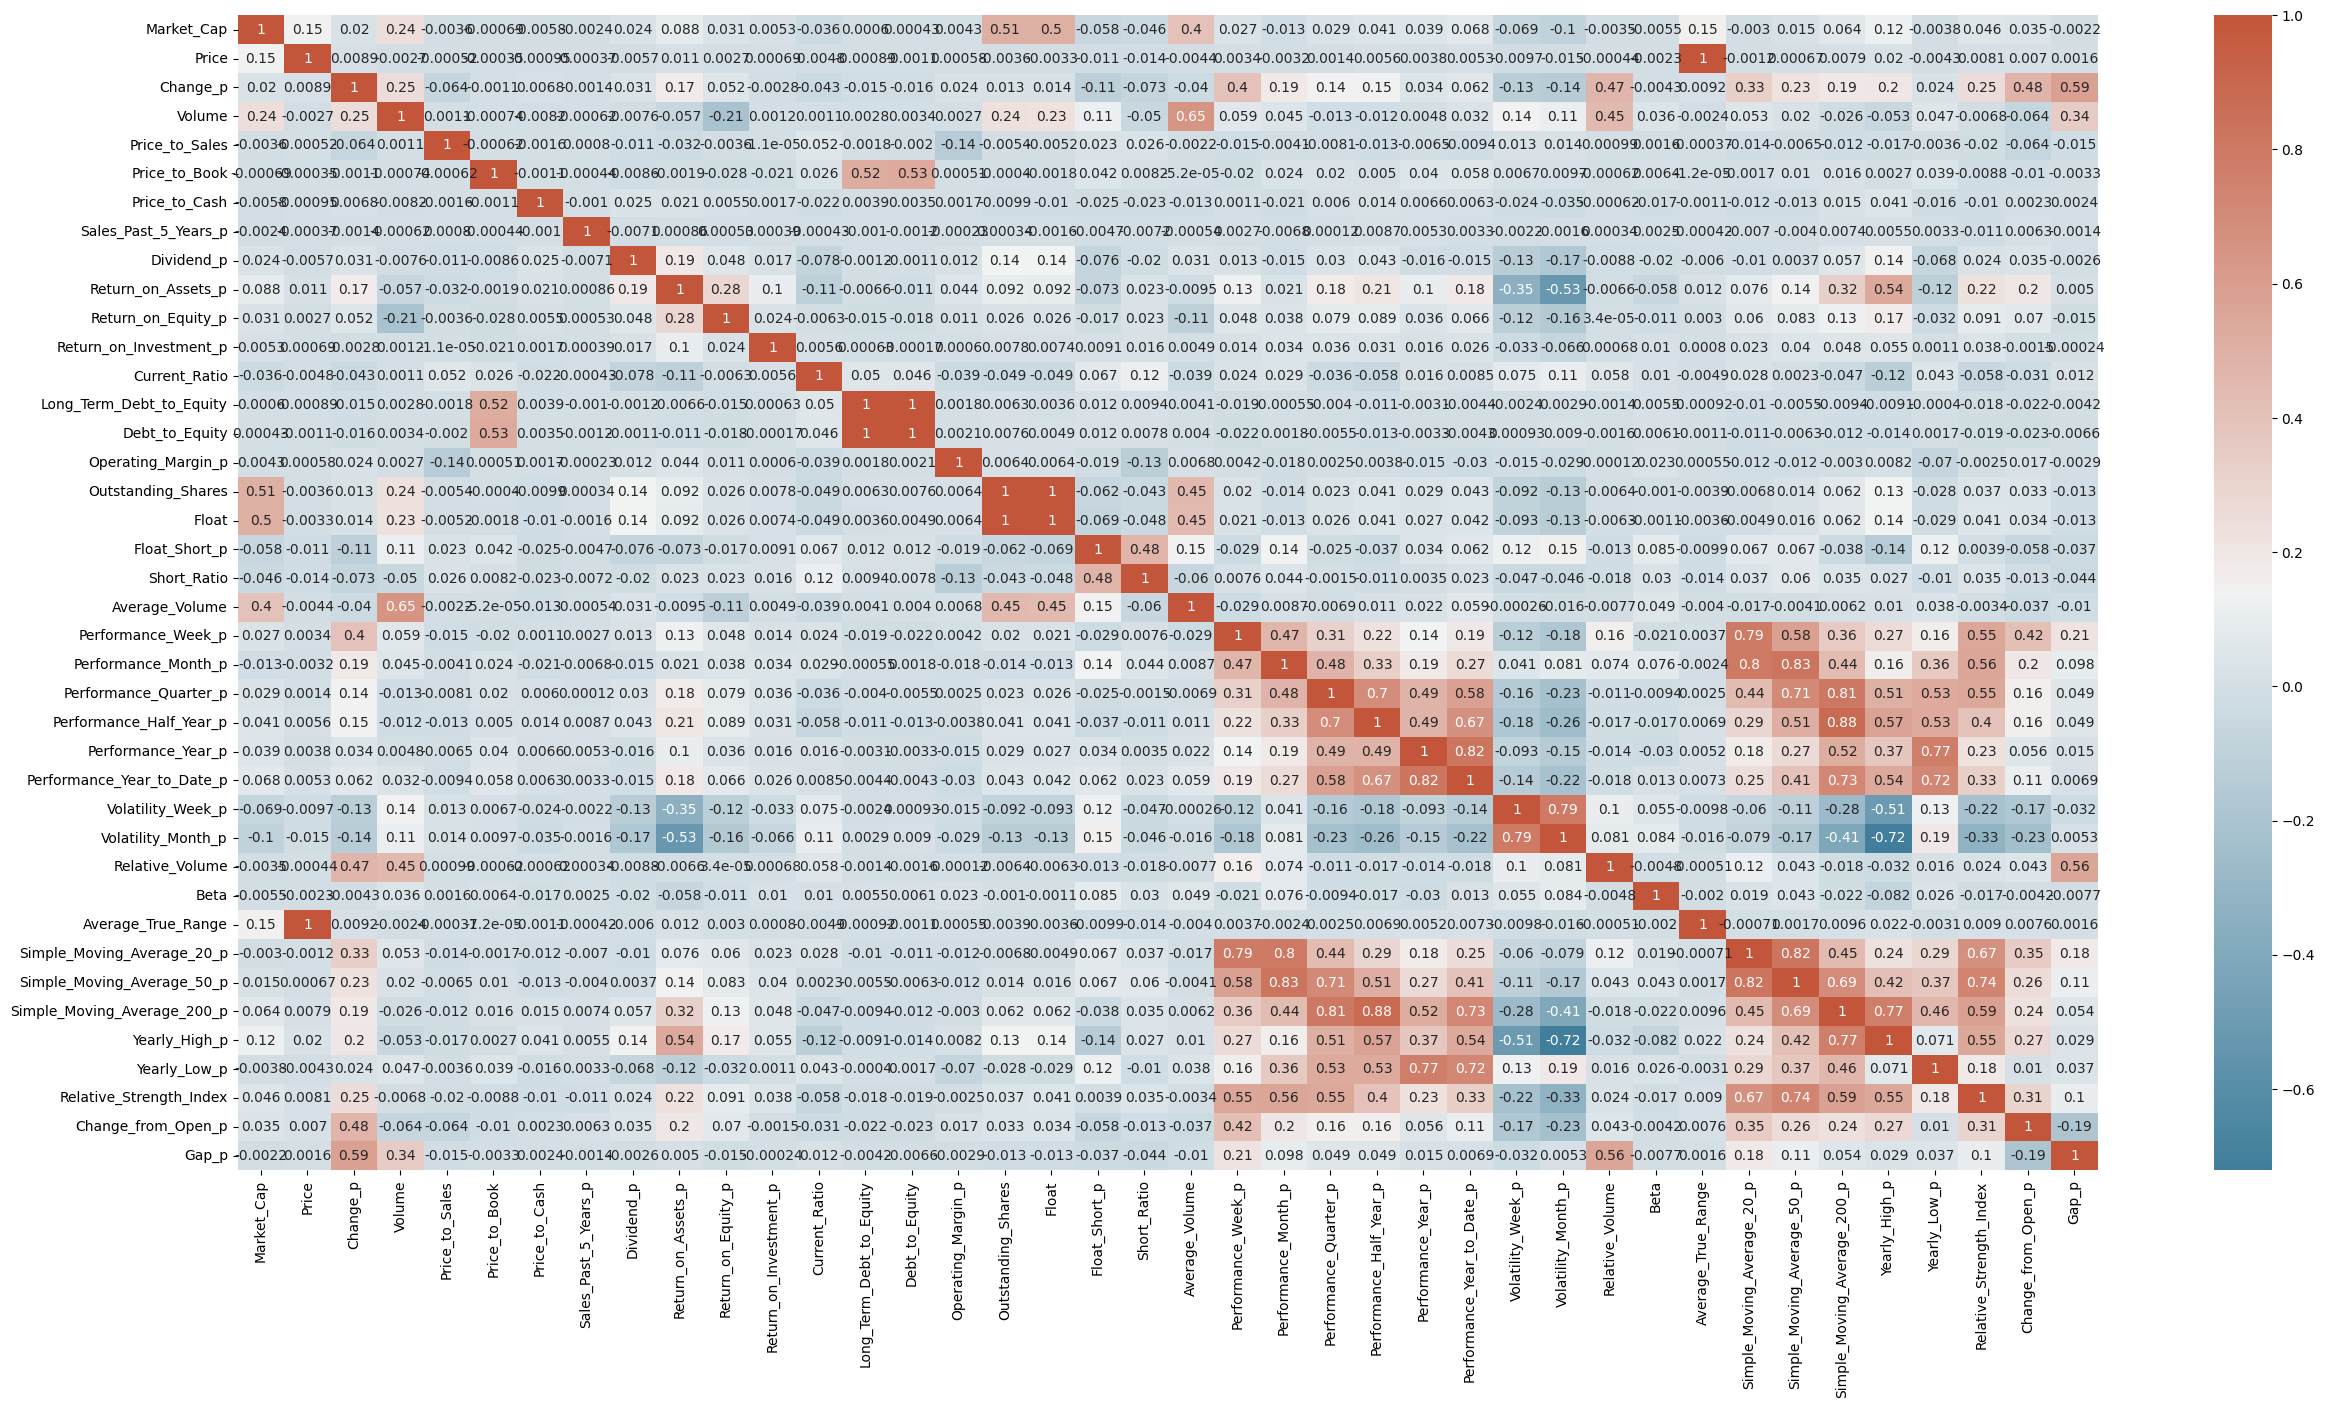

In [ ]:
create_correlation_matrix(df, (30,15), masked=False)

The correlation heatmap show that 'Price' have huge positive correlation only with each 'Average_True_Range', 'Performance' columns has positive correlation with 'Simple_Moving_Average' columns, 'Yearly_High' and 'Yearky_Low' column, and 'Relative_Strength_Index'. And whether 'Weekly_Low_p' is negatively correlated with 'Monthly_Low_p'

Let's reshape Perfomance columns for the future visualization and analyze in Power BI.

In [ ]:
perf_columns = [item for item in df.columns if item.find("Performance") != -1 and item.find("Date") == -1]
perf_columns.append('Sector')

In [ ]:
average_sector_performance = df[perf_columns].groupby(['Sector']).mean()
average_sector_performance.reset_index(inplace=True)
average_sector_performance

,Sector,Performance_Week_p,Performance_Month_p,Performance_Quarter_p,Performance_Half_Year_p,Performance_Year_p
0,Basic Materials,-3.14,6.33,-3.85,-6.59,-5.76
1,Communication Services,-1.33,9.46,-1.22,-7.50,-4.72
2,Consumer Cyclical,-0.28,9.84,-1.78,-4.51,0.96
3,Consumer Defensive,-1.84,6.08,-1.85,0.38,-7.04
4,Energy,-3.70,-0.73,-8.13,5.81,6.64
5,Financial,0.46,8.71,6.06,7.45,4.87
6,Healthcare,-0.91,12.55,-6.61,-18.02,-5.30
7,Industrials,-0.80,8.77,-0.19,-0.76,9.22
8,Real Estate,-3.58,5.27,-19.95,-24.37,-13.92
9,Technology,-0.60,11.18,-3.27,-8.15,2.87


In [ ]:
perf_columns.remove('Sector')

In [ ]:
sectors = list(average_sector_performance['Sector'])

result_dict = {'sector': [], 'date_string': [], 'performance': []}

for sector in sectors:
  for date_str in perf_columns:
    result_dict['sector'].append(sector)
    result_dict['date_string'].append(date_str)
    value = float(average_sector_performance[average_sector_performance['Sector'] == sector][date_str])
    result_dict['performance'].append(value)

performance_df = pd.DataFrame(result_dict)
performance_df

,sector,date_string,performance
0,Basic Materials,Performance_Week_p,-3.14
1,Basic Materials,Performance_Month_p,6.33
2,Basic Materials,Performance_Quarter_p,-3.85
3,Basic Materials,Performance_Half_Year_p,-6.59
4,Basic Materials,Performance_Year_p,-5.76
5,Communication Services,Performance_Week_p,-1.33
6,Communication Services,Performance_Month_p,9.46
7,Communication Services,Performance_Quarter_p,-1.22
8,Communication Services,Performance_Half_Year_p,-7.50
9,Communication Services,Performance_Year_p,-4.72


I should save this data, and send it to Power BI

In [ ]:
performance_df.to_csv('companies_performance.csv')

'Float' cannot be less than zero, and for analysis I don’t need companies whose number of traded shares is zero, so we throw them out.

In [ ]:
df = df[~df.index.isin(df[df['Float']<=0].index)]

**Remove columns**

Debt_to_Equity

Volatility_Week_p

Volatility_Month_p


In [ ]:
df.drop(columns=['Debt_to_Equity', 'Volatility_Week_p', 'Volatility_Month_p'], inplace=True)

### **OUTLIERS**



In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Market_Cap,Price,Change_p,Volume,Price_to_Sales,Price_to_Book,Price_to_Cash,Sales_Past_5_Years_p,Dividend_p,Return_on_Assets_p,Return_on_Equity_p,Return_on_Investment_p,Current_Ratio,Long_Term_Debt_to_Equity,Operating_Margin_p,Outstanding_Shares,Float,Float_Short_p,Short_Ratio,Average_Volume,Performance_Week_p,Performance_Month_p,Performance_Quarter_p,Performance_Half_Year_p,Performance_Year_p,Performance_Year_to_Date_p,Relative_Volume,Beta,Average_True_Range,Simple_Moving_Average_20_p,Simple_Moving_Average_50_p,Simple_Moving_Average_200_p,Yearly_High_p,Yearly_Low_p,Relative_Strength_Index,Change_from_Open_p,Gap_p
count,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00,4578.00
mean,11584015744.87,162.42,-0.75,623308.87,42.30,22.79,194.21,464.74,1.18,-12.12,-27.78,-67.54,3.56,1.35,-6940.00,206749299.11,185225660.37,4.12,4.23,1401183.81,-0.88,9.36,-2.03,-5.30,0.64,1.61,2.34,1.13,2.80,2.33,3.68,-5.48,-33.74,53.54,55.25,-0.55,-0.11
std,80391502079.13,8090.70,4.58,3289715.07,1356.62,887.48,3538.50,24119.33,3.07,36.18,340.61,2284.66,7.16,19.87,225688.96,767430618.15,739934151.45,5.63,4.48,4404974.34,10.06,25.12,32.64,46.70,100.57,66.97,50.36,1.85,112.49,12.55,18.73,31.42,27.76,106.41,12.90,4.20,3.66
min,290000.00,0.02,-52.20,0.00,0.01,0.01,0.01,-73.75,0.00,-509.33,-19165.68,-152683.33,0.00,0.00,-12328770.77,460000.00,110000.00,0.00,0.00,380.00,-93.50,-93.86,-96.21,-99.02,-99.83,-99.80,0.00,-7.04,0.01,-93.25,-91.49,-98.80,-99.92,-50.23,7.76,-45.27,-58.80
25%,91730000.00,3.27,-1.89,12616.00,0.36,0.91,1.31,0.70,0.00,-17.18,-32.19,-26.46,0.95,0.03,-9.47,18980000.00,11652500.00,0.70,1.46,61597.50,-4.01,-0.09,-16.39,-26.79,-32.74,-30.17,0.59,0.65,0.17,-1.73,-3.89,-19.87,-52.12,16.28,46.10,-1.59,-0.60
50%,565485000.00,11.53,-0.29,68441.50,1.30,1.71,5.37,9.16,0.00,0.69,1.94,1.44,1.77,0.28,2.70,47140000.00,37090000.00,2.12,3.04,314855.00,-0.12,7.50,-0.22,-3.17,-5.22,-3.62,0.85,1.07,0.47,2.03,3.90,-1.46,-26.69,31.62,55.47,0.00,-0.01
75%,3687500000.00,39.03,0.60,283414.25,3.07,3.55,18.83,24.72,1.40,4.72,12.76,8.35,3.66,0.85,14.57,131712500.00,107602500.00,5.18,5.53,1100000.00,2.25,16.42,10.54,12.10,17.66,20.59,1.20,1.49,1.19,6.36,11.54,9.86,-10.31,58.41,64.78,0.96,0.37
max,2982570000000.00,547380.00,110.65,84063544.00,89101.04,51660.00,228645.80,1629025.70,80.69,373.10,3586.84,4271.60,203.35,1305.75,442066.67,16740000000.00,15940000000.00,76.14,64.40,121420000.00,184.84,404.52,787.50,1351.84,3801.10,1692.93,2524.11,96.31,7609.37,187.25,197.66,297.17,7.86,4076.47,94.67,67.40,169.38


In [ ]:
df.shape

(4578, 43)

Descriptive statistics shows that almost every column contain outliers, but I can't check all of them manually, because there are 63 column, it's very time consuming. So I will write classes for handling outliers.

### Outliers handler

Firts of all I need constants for saving outliers data.

In [ ]:
from dataclasses import dataclass, asdict
from sklearn.preprocessing import MinMaxScaler, StandardScaler, minmax_scale
from scipy import stats
from enum import Enum


class OutlierDetectMethods(Enum):
    IQR = 'iqr'
    STD = 'std'
    Z_SCORE = 'z_score'


class NormMethods(Enum):
    MATH = 'math'
    STATS = 'stats'
    SKLEARN = 'sklearn'


@dataclass
class OutliersData:
    # column: str
    lower_limit: float
    upper_limit: float
    max: float
    min: float
    median: float
    mode: float
    zero_presence: bool
    count: int
    proportion: float
    indexes: list

    def __init__(self, lower_limit=None, upper_limit=None, max=None, min=None,
                 median=None, mode=None, zero_presence=None, count=None, proportion=None, indexes=[]):
        # self.column = column
        self.lower_limit = lower_limit
        self.upper_limit = upper_limit
        self.max = max
        self.min = min
        self.median = median
        self.mode = mode
        self.zero_presence = zero_presence
        self.count = count              # Number of rows in the data containing outliers in column
        self.proportion = proportion
        self.indexes = indexes

Next step is OutliersCLass where I can calculate and detect outliers data.

In [ ]:
class OutliersClass:
    def __init__(self, df):
        self.df = df

    def detect_by_iqr_method(self, column, q1=0.25, q3=0.75, threshold=1.5):
        percentile_q1 = self.df[column].quantile(q1)  # Compute the q1 percentile value in column
        percentile_q3 = self.df[column].quantile(q3)  # Compute the q3 percentile value in column
        iqr = percentile_q3 - percentile_q1            # Compute the interquartile range in column

        # Define the upper limit and lower limit for non-outlier values in column
        upper_limit = round(percentile_q3 + threshold * iqr, 2)
        lower_limit = round(percentile_q1 - threshold * iqr, 2)
        outliers = self.df[(self.df[column] > upper_limit) | (self.df[column] < lower_limit)]
        # print(f"[IQR] Number of rows in the data containing outliers in `{column}`:", len(outliers))
        return lower_limit, upper_limit, outliers

    def detect_by_std_method(self, column, threshold=3):
        upper_limit = self.df[column].mean() + threshold * self.df[column].std()  # Right from the mean
        lower_limit = self.df[column].mean() - threshold * self.df[column].std()  # Left from the mean
        outliers = self.df[(self.df[column] > upper_limit) | (self.df[column] < lower_limit)]
        # print(f"[STD] Number of rows in the data containing outliers in `{column}`:", len(outliers))
        return lower_limit, upper_limit, outliers

    def detect_by_z_score_method(self, column, threshold=3):
        # Calculate the z-score for column
        z = np.abs(stats.zscore(self.df[column]))
        # Identify outliers as value with a z-score greater than threshold and return the outliers
        return -threshold, threshold, self.df[z > threshold]

    def log_normalization(self, column):
        self.df[column] = np.log(self.df[column])

    def min_max_normalization(self, column, method=NormMethods.MATH):
        if method == NormMethods.MATH:
            max_value = self.df[column].max()
            min_value = self.df[column].min()
            # print('MAX:', max_value, "MIN:", min_value)
            self.df[column] = (self.df[column] - min_value) / (max_value - min_value)
        elif method == NormMethods.STATS:
            self.df[[column]] = minmax_scale(self.df[[column]])     # or several columns
        elif method == NormMethods.SKLEARN:
            scaler = MinMaxScaler()
            # Scaling column of the created dataFrame and storing
            self.df[[column]] = scaler.fit_transform(self.df[[column]])

    def z_score_standardization(self, column, method=NormMethods.MATH):
        if method == NormMethods.MATH:
            self.df[column] = (self.df[column] - self.df[column].mean()) / self.df[column].std()
        elif method == NormMethods.STATS:
            # Z-Score using pandas
            self.df[column] = stats.zscore(self.df[column])
        elif method == NormMethods.SKLEARN:
            scaler = StandardScaler()
            self.df[[column]] = scaler.fit_transform(self.df[[column]])


And the last one - OutliersHandler where I can find, remove or transform data

In [ ]:
class OutliersBaseHandler(OutliersClass):
    def __init__(self, df):
        super().__init__(df)
        self.outliers_dict = {column: None for column in self.df.describe().columns}

    def find_outliers_params(self,  column: str, method=OutlierDetectMethods.STD):
        assert column in list(self.outliers_dict.keys()), f"There is no such column as {column} in the DataFrame"

        if method == OutlierDetectMethods.IQR:
            lower_limit, upper_limit, outliers = self.detect_by_iqr_method(column)
        elif method == OutlierDetectMethods.STD:
            lower_limit, upper_limit, outliers = self.detect_by_std_method(column)
        elif method == OutlierDetectMethods.Z_SCORE:
            outliers = self.detect_by_z_score_method(column)

        if self.outliers_dict[column] is not None:
          raise Exception(f"Outlier params can not be redefined for the column {column}")

        zero_presence = bool(self.df[df[column]==0].shape[0])

        self.outliers_dict[column] = OutliersData(
            lower_limit=lower_limit,
            upper_limit=upper_limit,
            max=self.df[column].max(),
            min=self.df[column].min(),
            median=self.df[column].mean(),
            mode=self.df[column].mode()[0],
            zero_presence=zero_presence,
            count=len(outliers),             # Determine the number of rows containing outliers
            proportion=round(len(outliers) / self.df.shape[0], 2),
            indexes=outliers.index
        )

    def visualize_box_plot(self, column):
        plt.figure(figsize=(6, 1))
        plt.title(f'Boxplot to detect outliers for {column}', fontsize=12)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        sns.boxplot(x=self.df[column])
        plt.show()

    def visualize_distribution(self, column: str, bins=50):
        outlier = self.outliers_dict[column]
        standards = self.df[~self.df.index.isin(outlier.indexes)]
        plt.title(f'Distribution of {column}', fontsize=12)
        plt.hist(standards[column], bins=bins, alpha=0.6, color='b')
        plt.show()

    def visualize_outlier_graphs(self, column: str, bins=50):
        outlier = self.outliers_dict[column]
        standards = self.df[~self.df.index.isin(outlier.indexes)]
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
        axes[0].title.set_text(f'Boxplot to detect outliers for {column}')
        axes[0].boxplot(x=self.df[column])
        axes[1].title.set_text(f'Distribution of {column}')
        axes[1].hist(standards[column], bins=bins, alpha=0.6, color='b')

    def remove_col_outliers(self, column: str):
        outlier = self.outliers_dict[column]
        self.df = self.df[~self.df.index.isin(outlier.indexes)]

    def replace_by_median(self, column: str):
        outlier = self.outliers_dict[column]
        self.df[outlier.column] = self.df[outlier.column].mask(self.df.index.isin(outlier.indexes), outlier.median)

    def replace_by_mode(self, column: str):
        outlier = self.outliers_dict[column]
        self.df[outlier.column] = self.df[outlier.column].mask(self.df.index.isin(outlier.indexes), outlier.mode)


class OutliersHandler(OutliersBaseHandler):
    def __init__(self, df):
        super().__init__(df)

    def find_outliers(self, columns=None, method=OutlierDetectMethods.STD):
        cols = self.outliers_dict.keys() if columns is None else columns

        for column in cols:
            self.find_outliers_params(column, method)

    def visualize_box_plots(self, columns=None):
        cols = self.outliers_dict.keys() if columns is None else columns

        for column in cols:
            self.visualize_box_plot(column)

    def visualize_distributions(self, columns=None, bins=50):
        cols = self.outliers_dict.keys() if columns is None else columns

        for column in cols:
            self.visualize_distribution(column, bins)

    def visualize_outliers_graphs(self, columns=None, bins=50):
        cols = self.outliers_dict.keys() if columns is None else columns

        for column in cols:
            self.visualize_outlier_graphs(column, bins)

    def log_normalize(self, columns=None, step_by_step=True):
        cols = self.outliers_dict.keys() if columns is None else columns

        if step_by_step:
          for column in cols:
              self.log_normalization(column)
        else:
          self.df[cols].assign(temp_f=np.log(self.df[column]))

    def min_max_normalize(self, columns=None, method=NormMethods.MATH):
        cols = self.outliers_dict.keys() if columns is None else columns

        for column in cols:
            self.min_max_normalization(column, method)

    def z_score_standardize(self, columns=None, method=NormMethods.MATH):
        cols = self.outliers_dict.keys() if columns is None else columns

        for column in cols:
            self.z_score_standardization(column, method)

    def remove_outliers(self, columns=None):
        cols = self.outliers_dict.keys() if columns is None else columns

        for column in cols:
            outliers_ids = self.outliers_dict[column].indexes
            self.remove_col_outliers(column)
            assert self.df[self.df.index.isin(outliers_ids)].shape[0] == 0, f"Outliers were not removed from DataFrame"
            self.outliers_dict[column].count = 0
            self.outliers_dict[column].proportion = 0

    def replace_outliers_by_median(self, columns=None):
        cols = self.outliers_dict.keys() if columns is None else columns

        for column in cols:
            self.replace_by_median(column)

    def replace_outliers_by_mode(self, columns=None):
        cols = self.outliers_dict.keys() if columns is None else columns

        for column in cols:
            self.replace_by_mode(column)

    def outliers_indexes(self, column: str):
        return self.outliers_dict[column].indexes

    def describe_outliers_df(self):
        ret_df = pd.DataFrame(columns=list(asdict(OutliersData()).keys())[:-1])

        for column, out_data in self.outliers_dict.items():
            df_dict = {key: [value] for key, value in asdict(out_data).items() if isinstance(value, float) or isinstance(value, int)}
            df_dict['column'] = column
            df_new = pd.DataFrame(df_dict)
            ret_df = pd.concat([ret_df, df_new], ignore_index=True)

        ret_df.set_index('column', inplace=True)

        return ret_df

    def get_result_df(self):
      return self.df

Let's find outlier in all columns:

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
outlier_handler = OutliersHandler(df)
outlier_handler.find_outliers()

Important step in handling outliers is visualzation:

<ipython-input-30-64362d0fd290>:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))


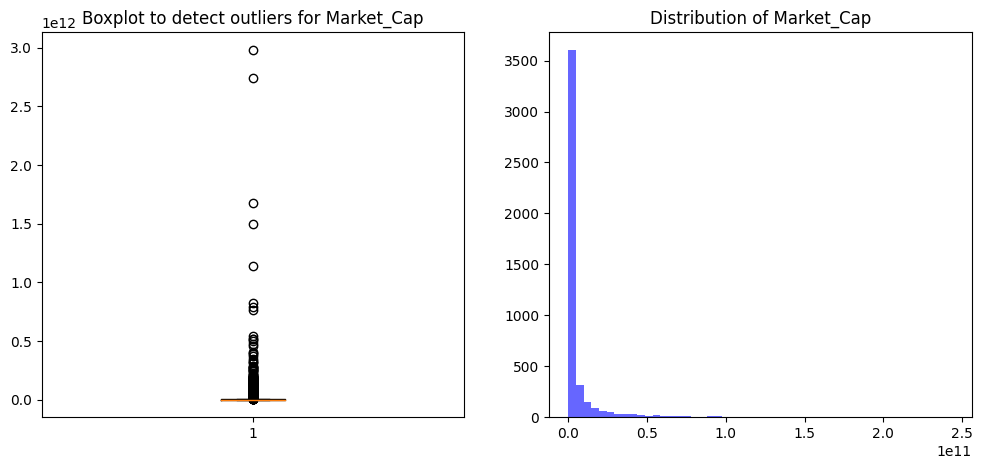

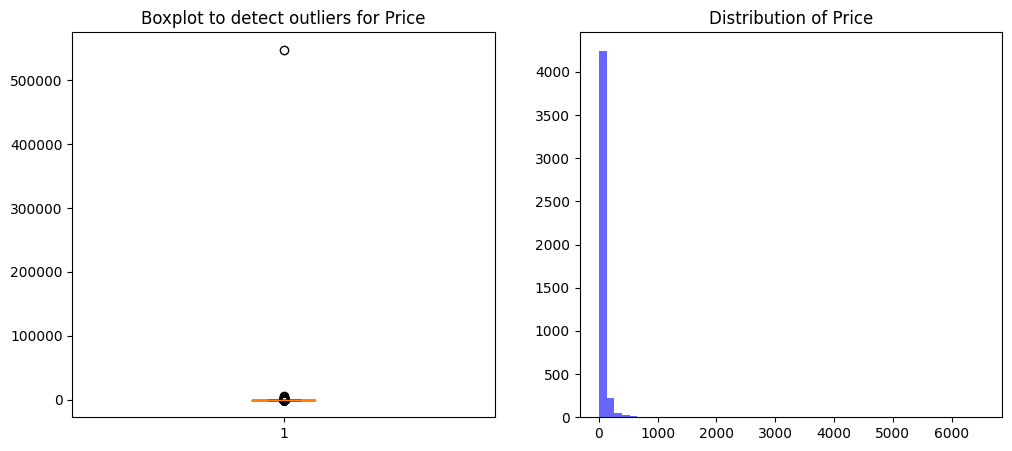

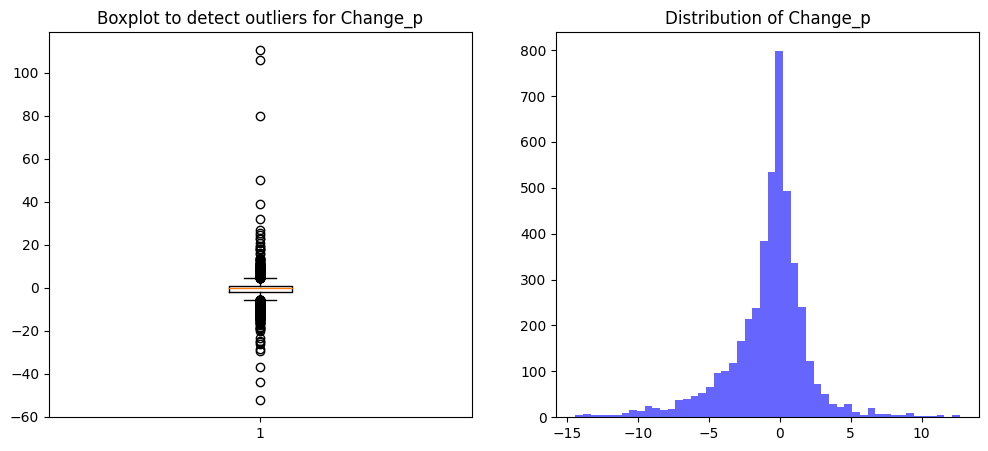

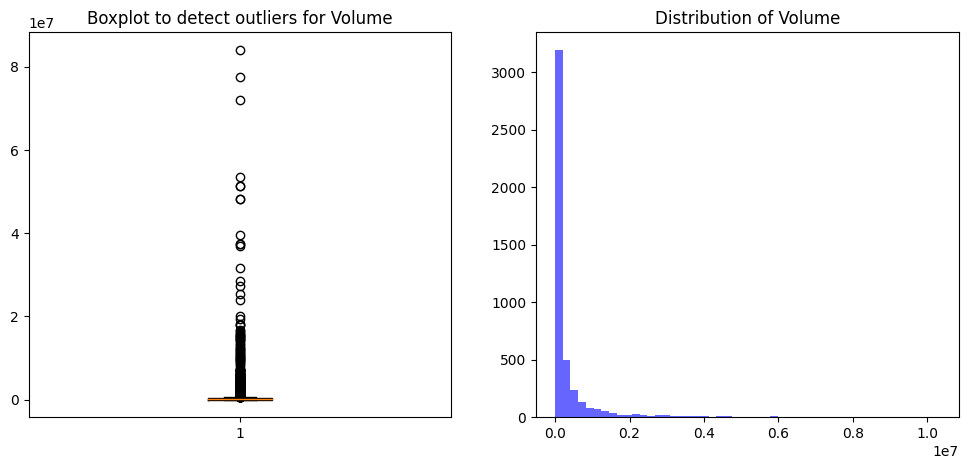

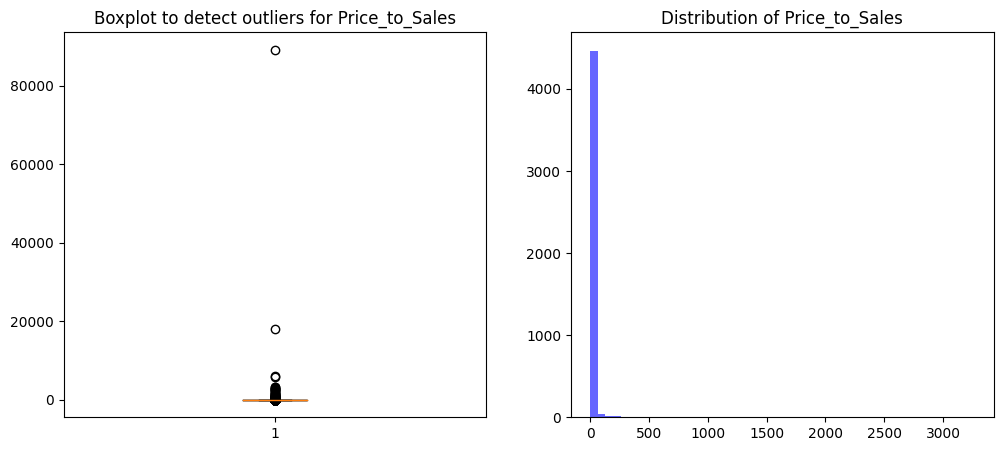

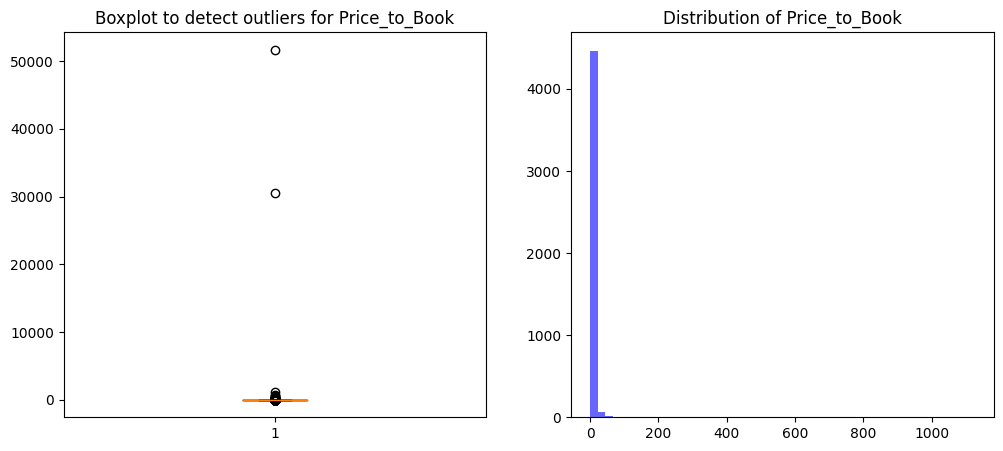

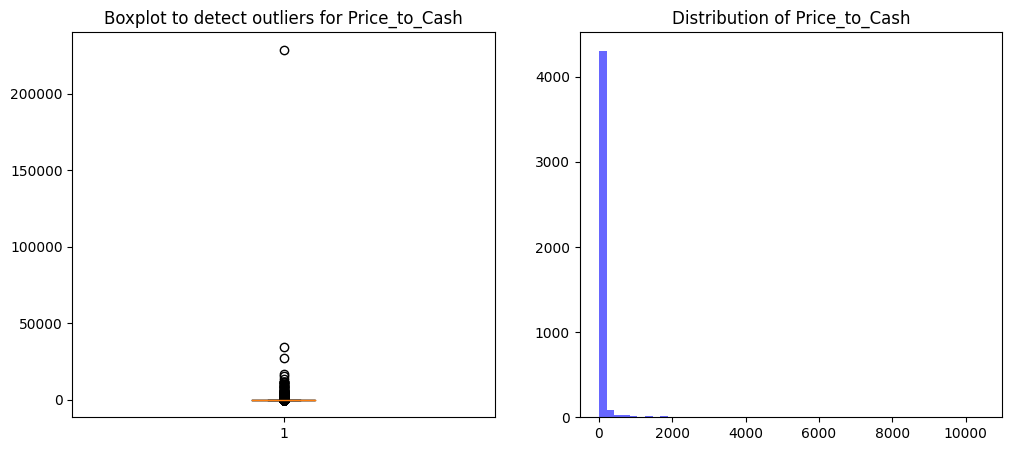

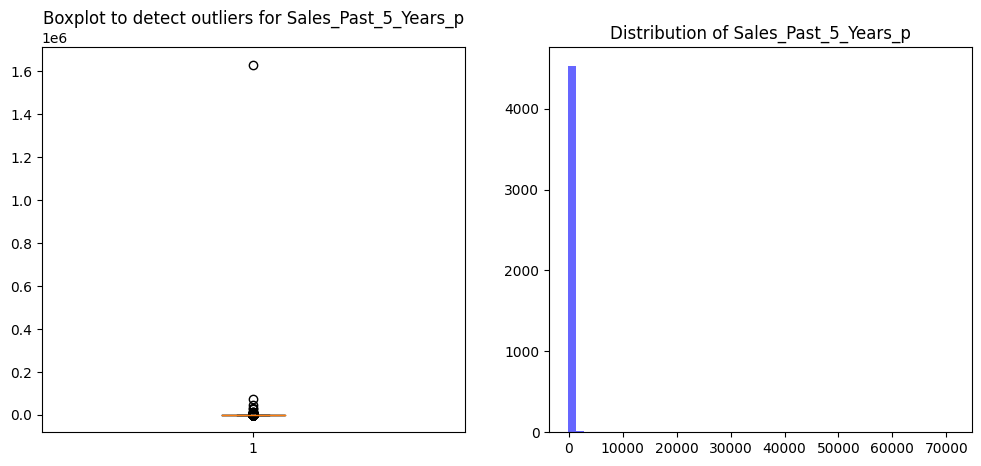

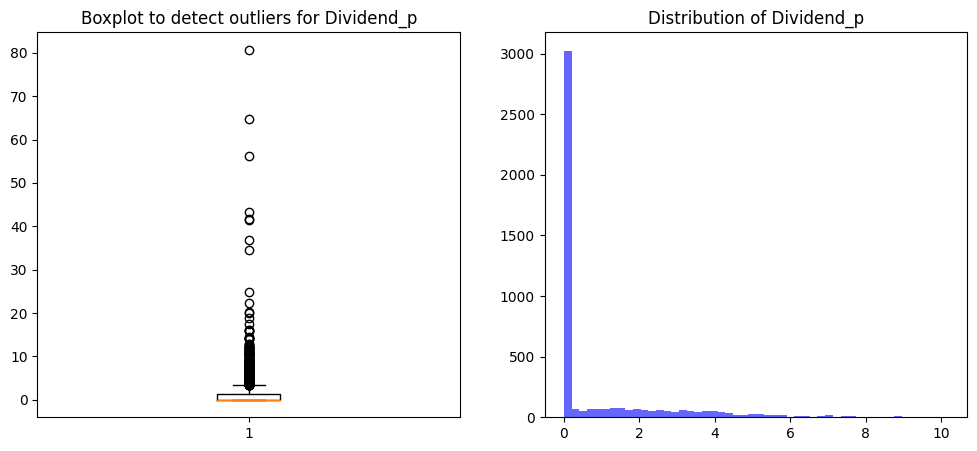

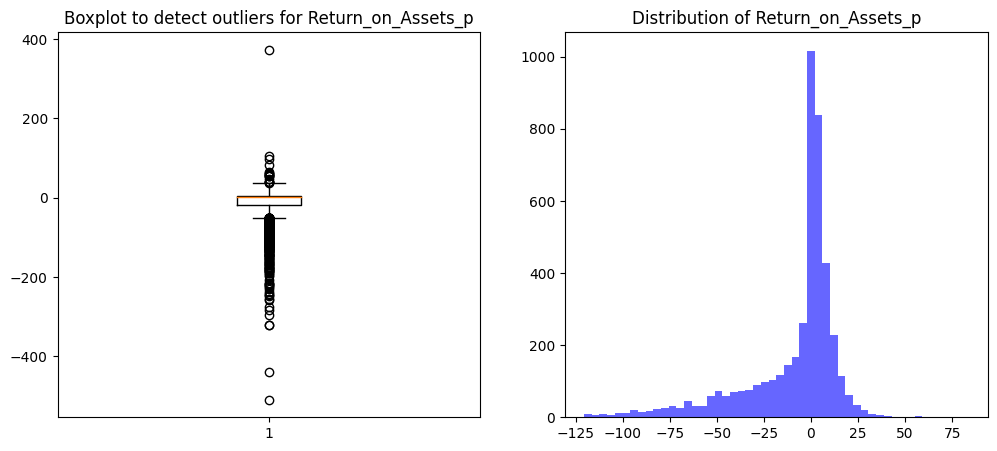

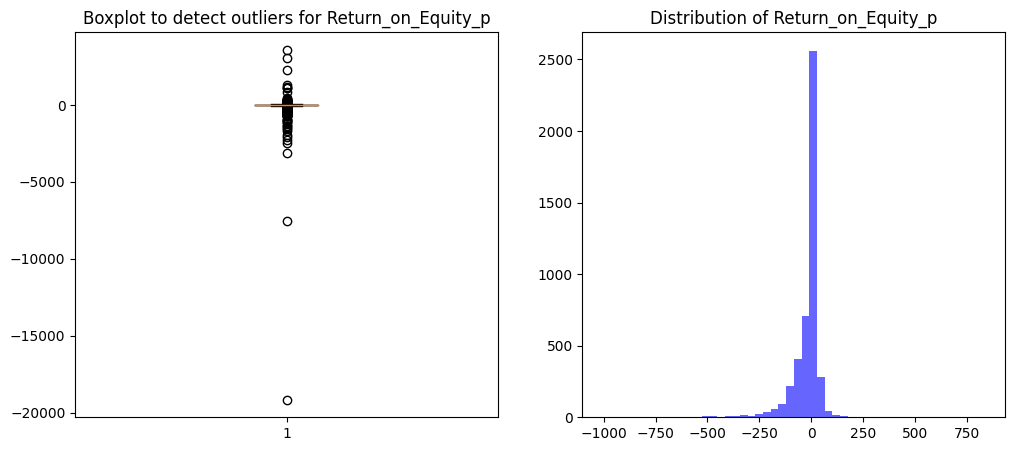

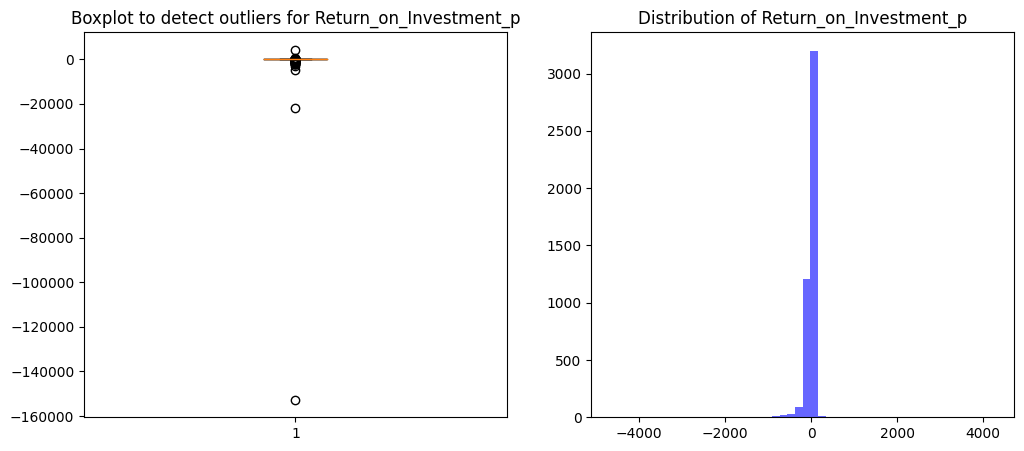

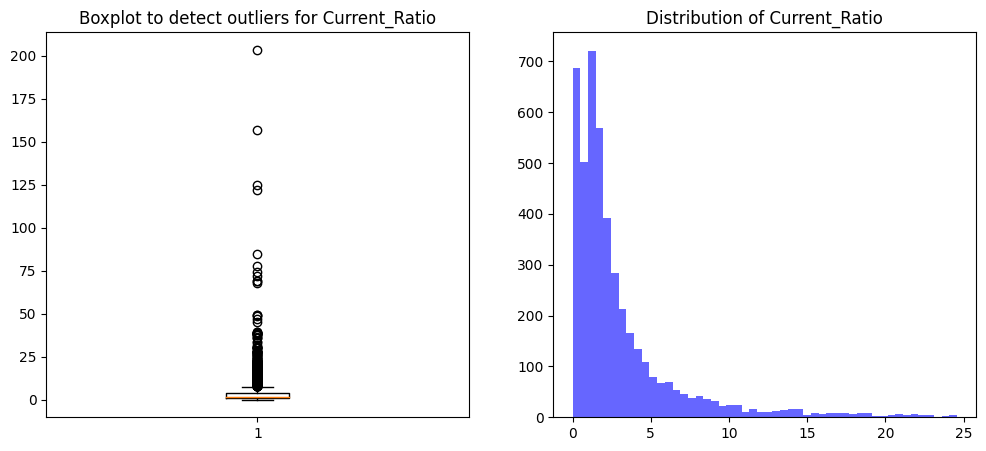

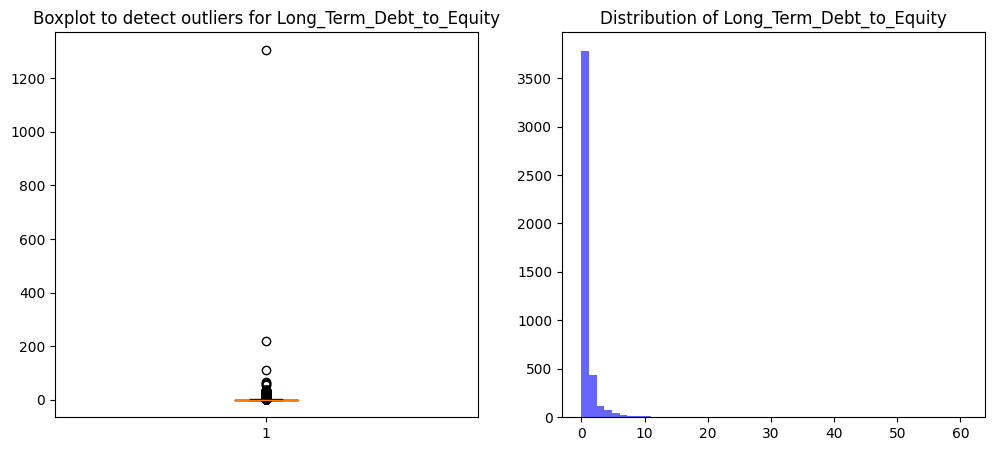

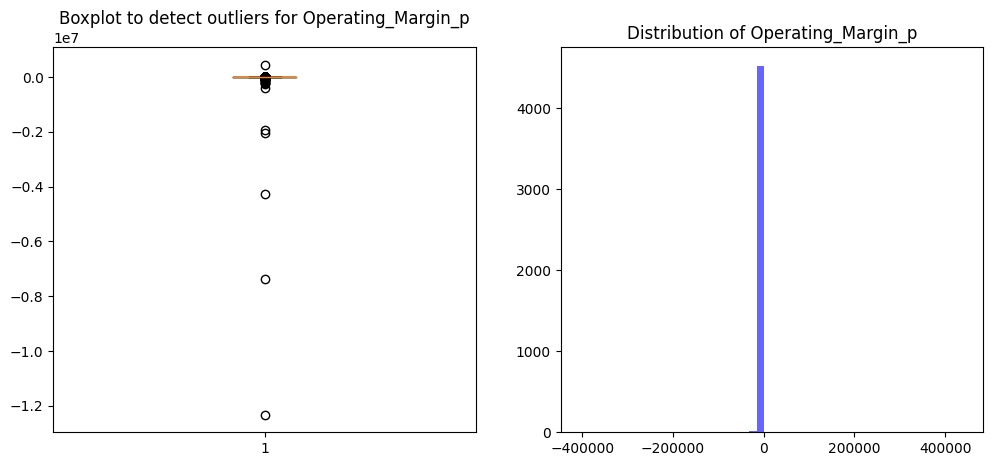

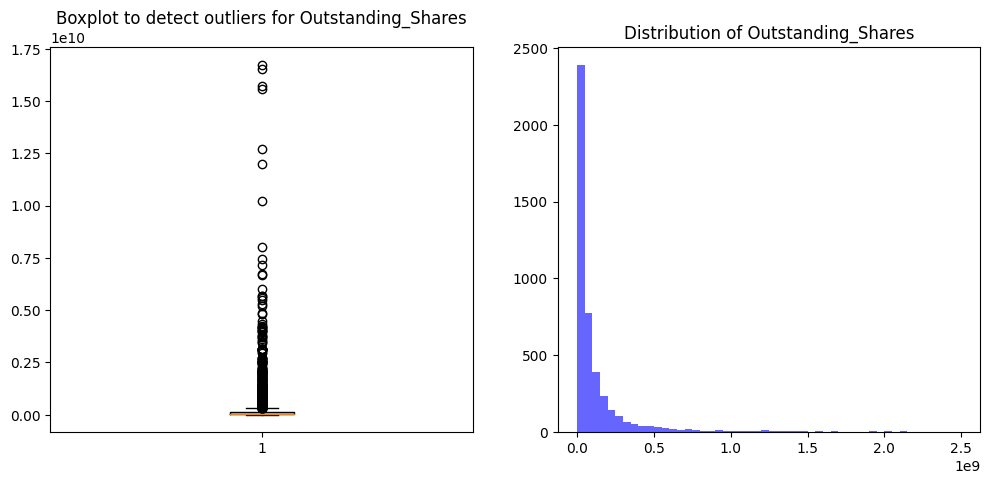

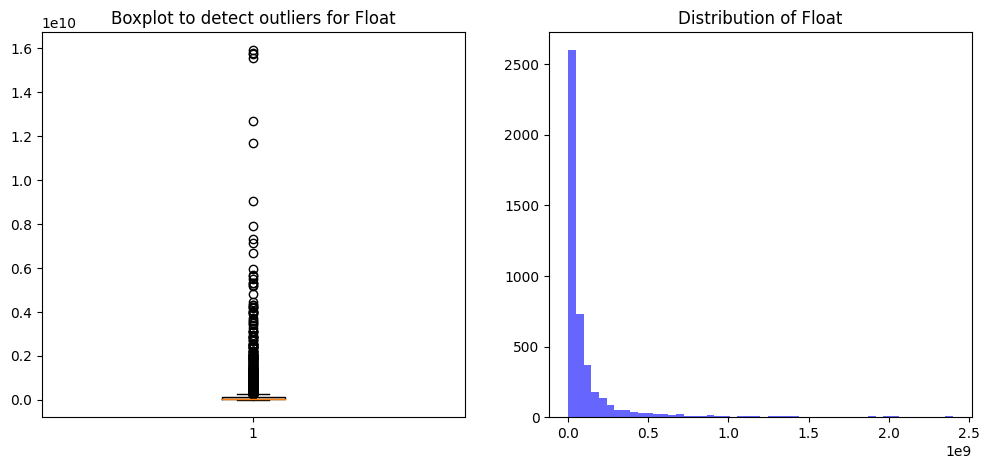

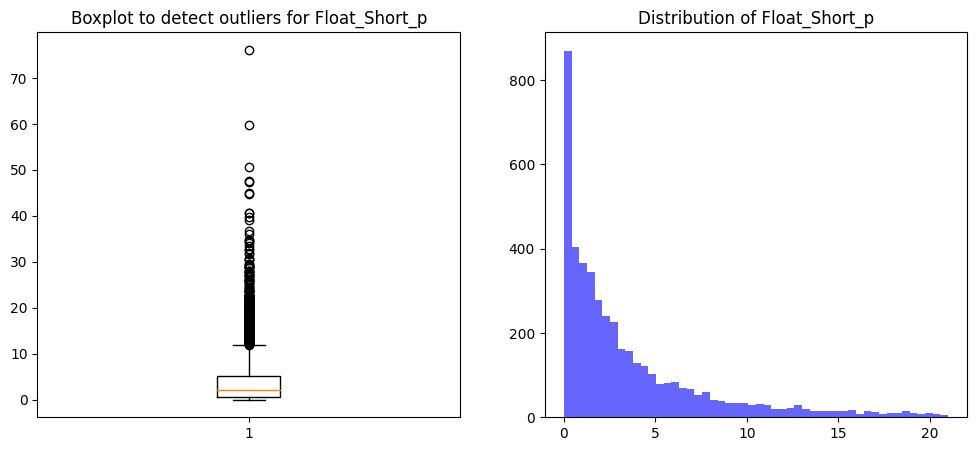

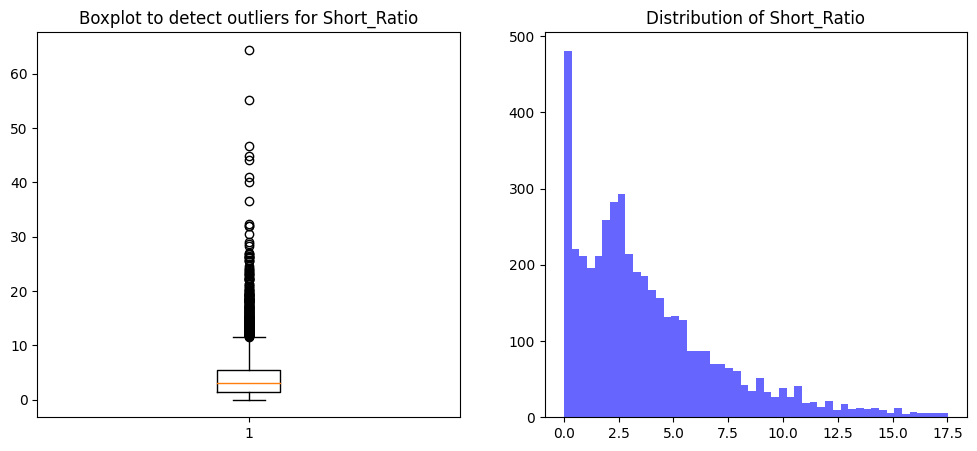

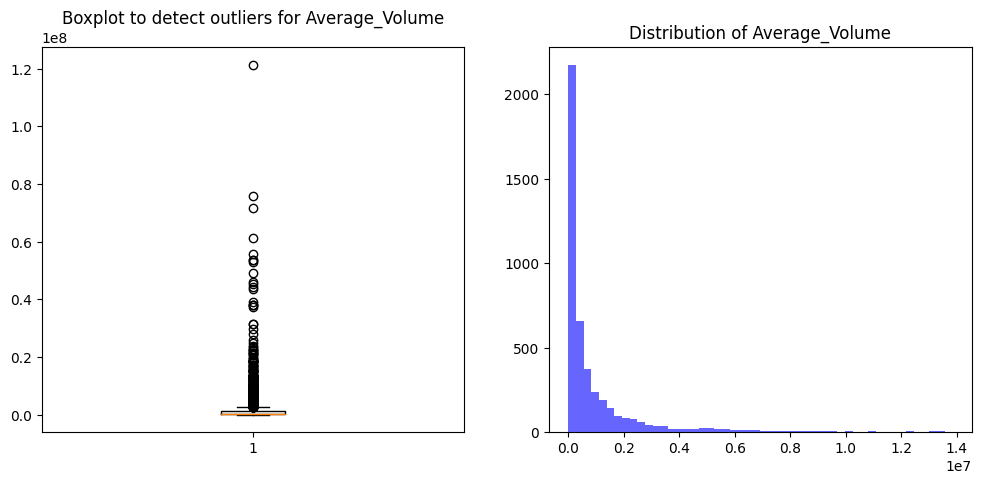

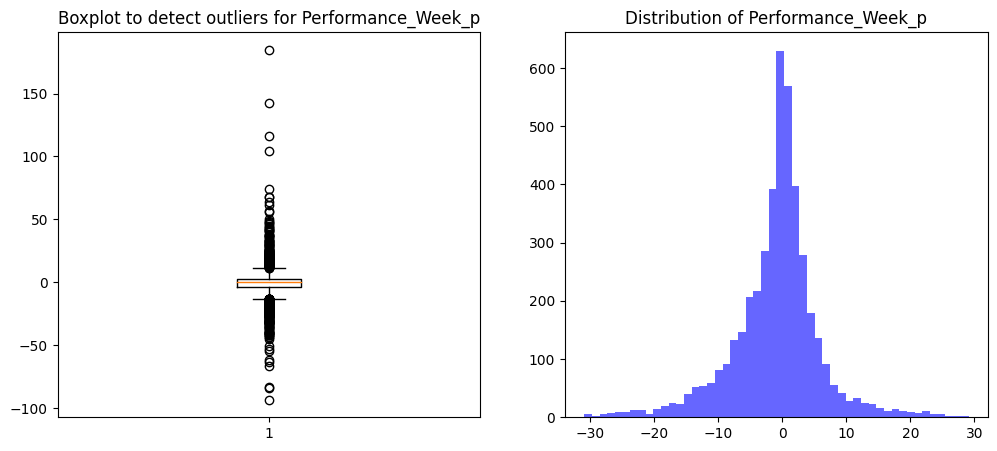

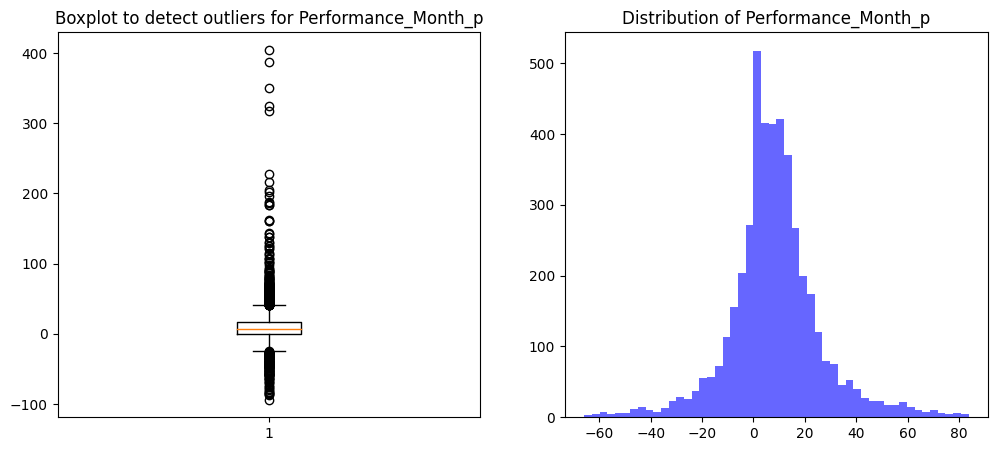

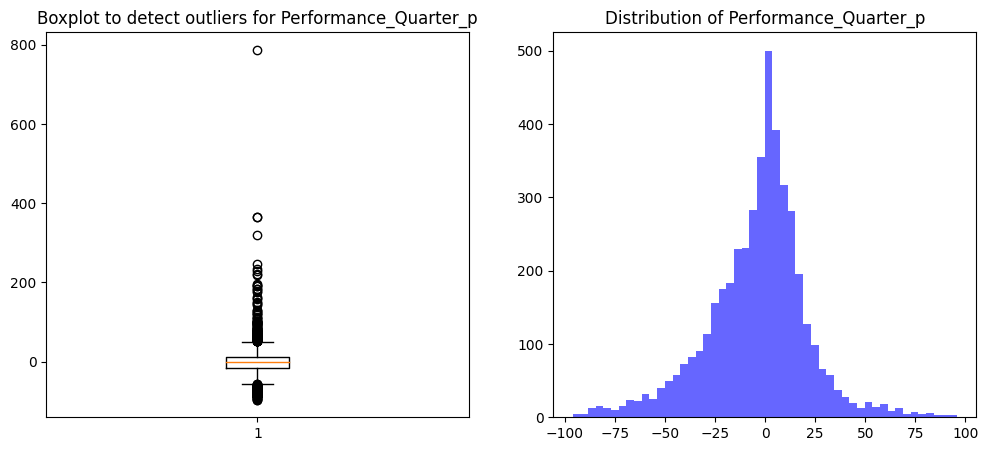

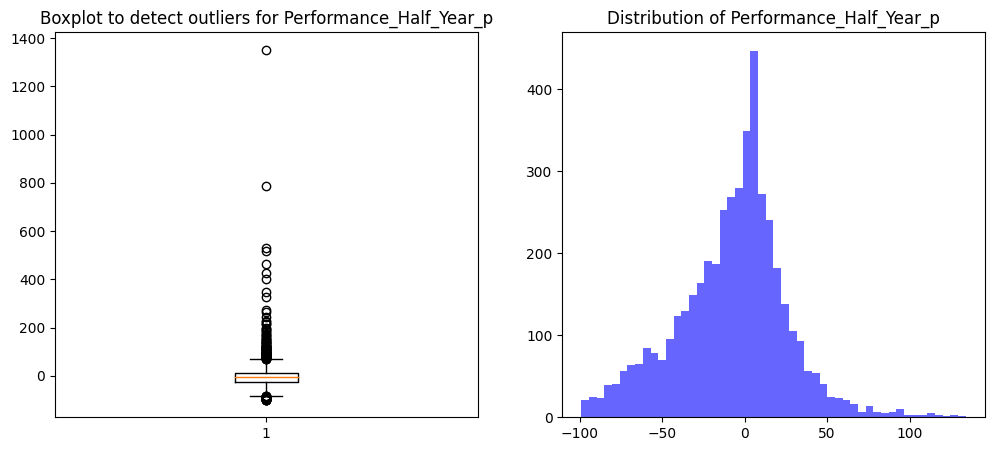

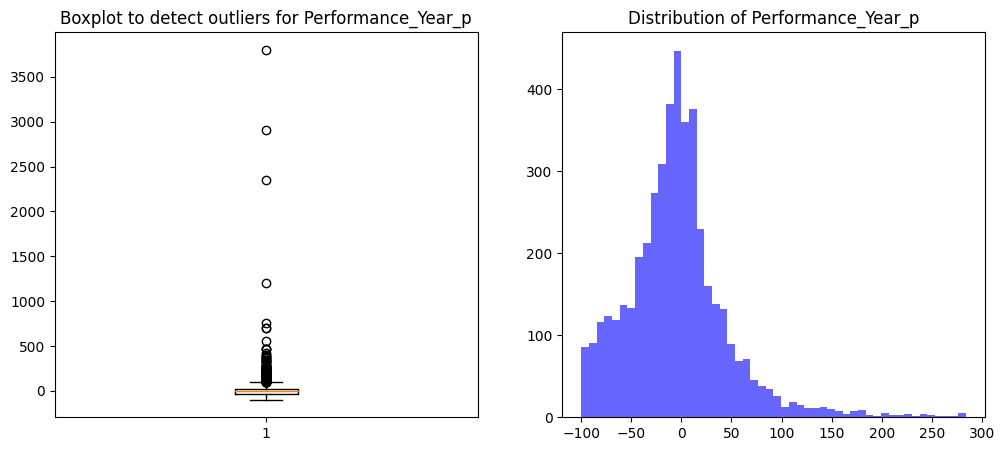

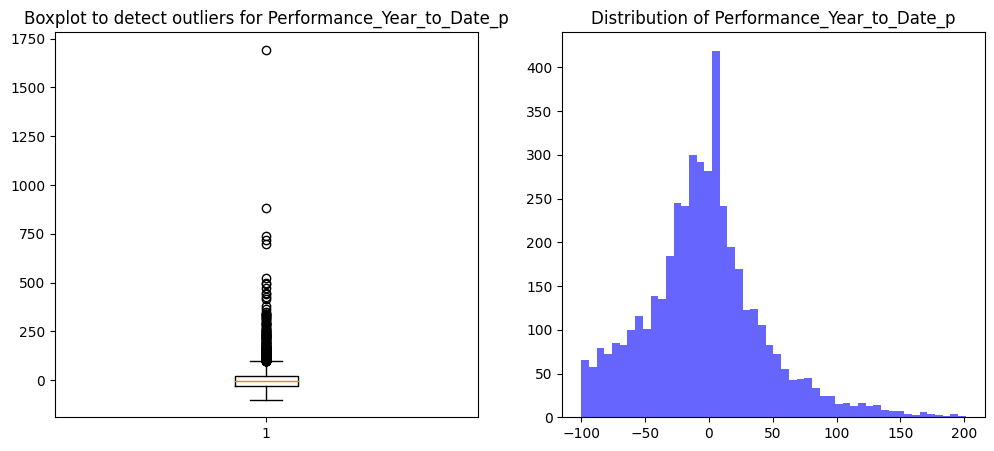

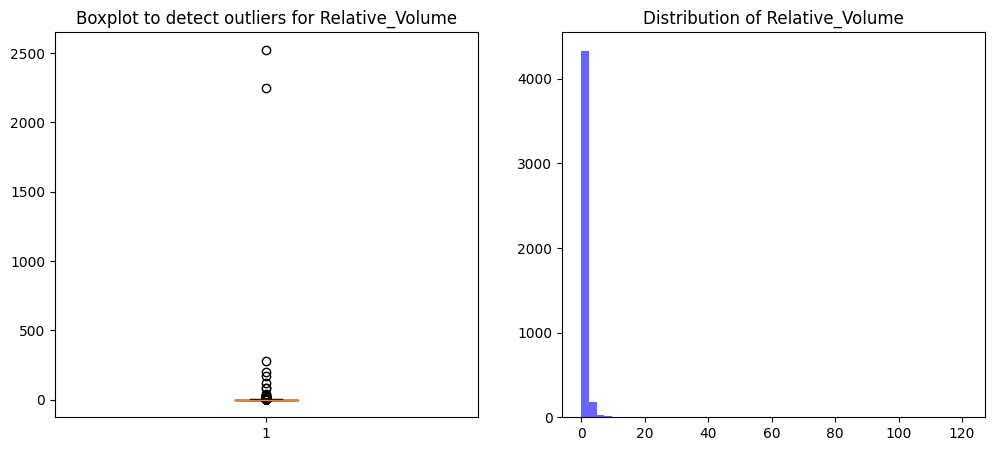

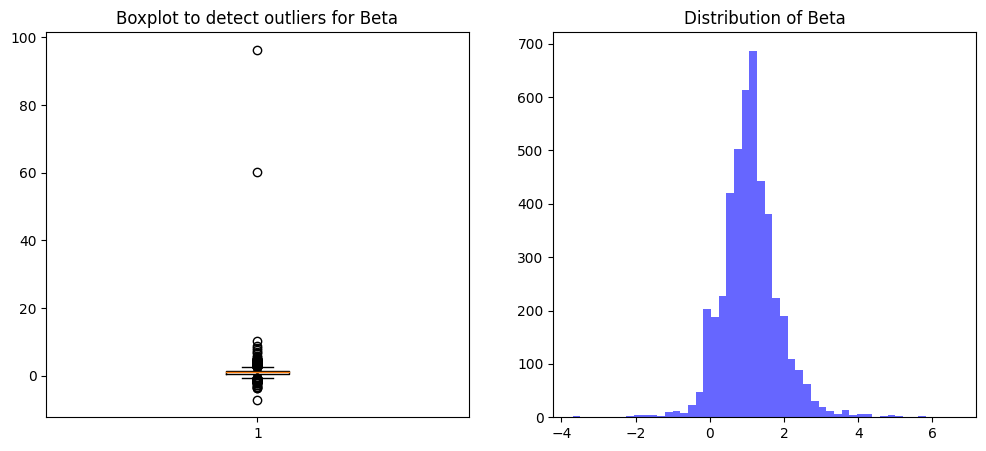

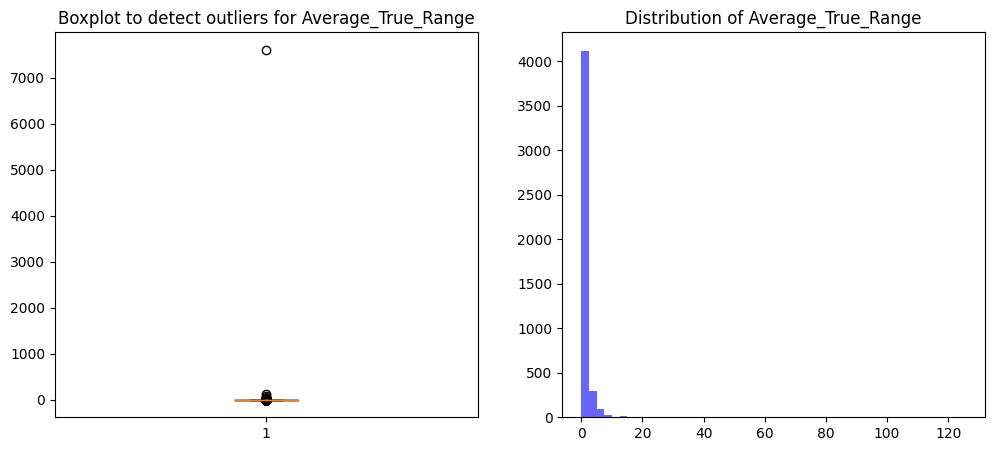

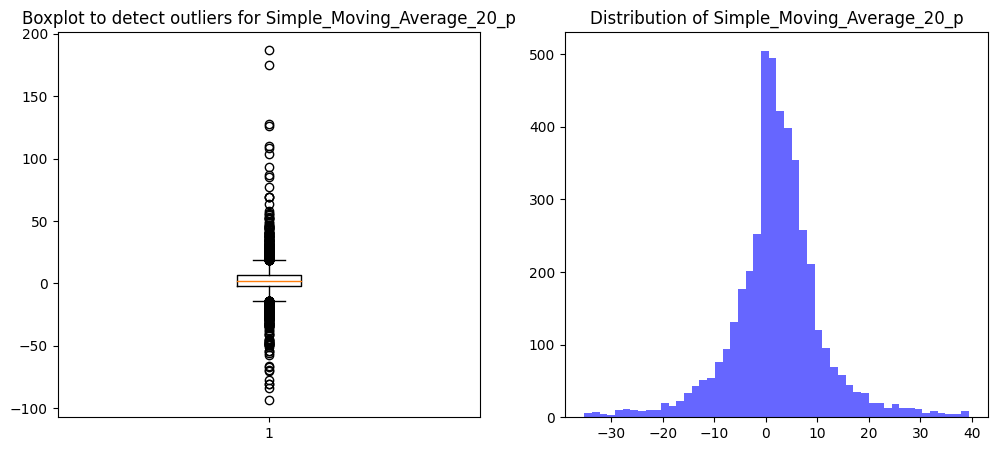

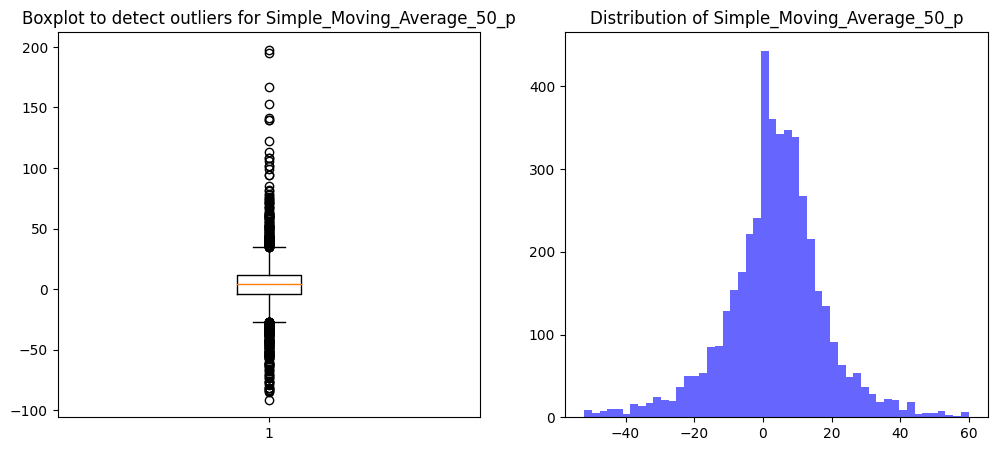

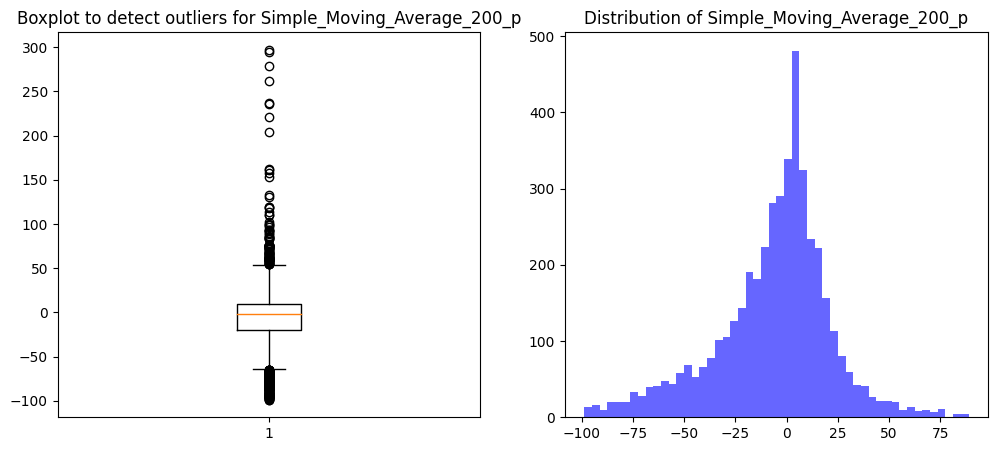

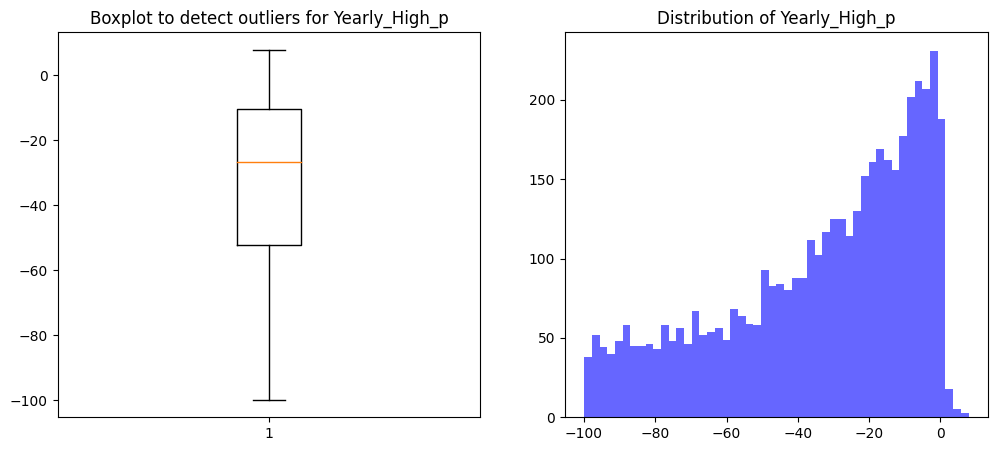

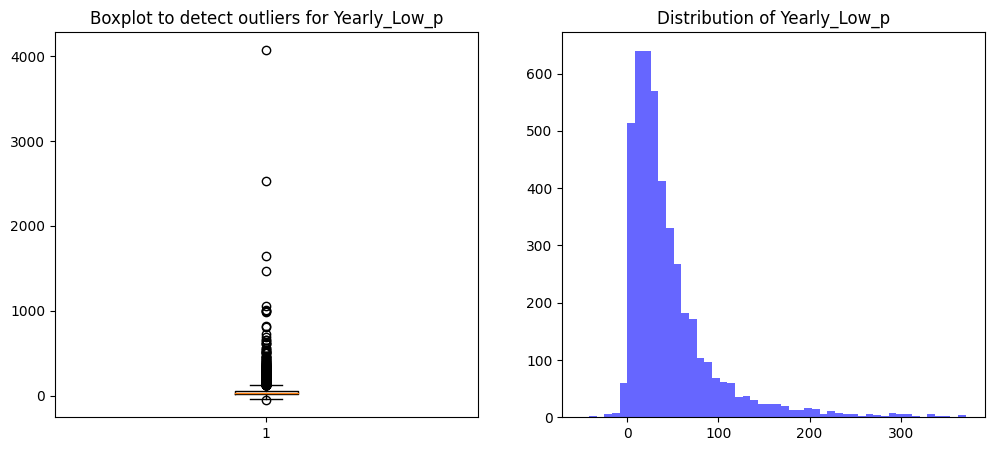

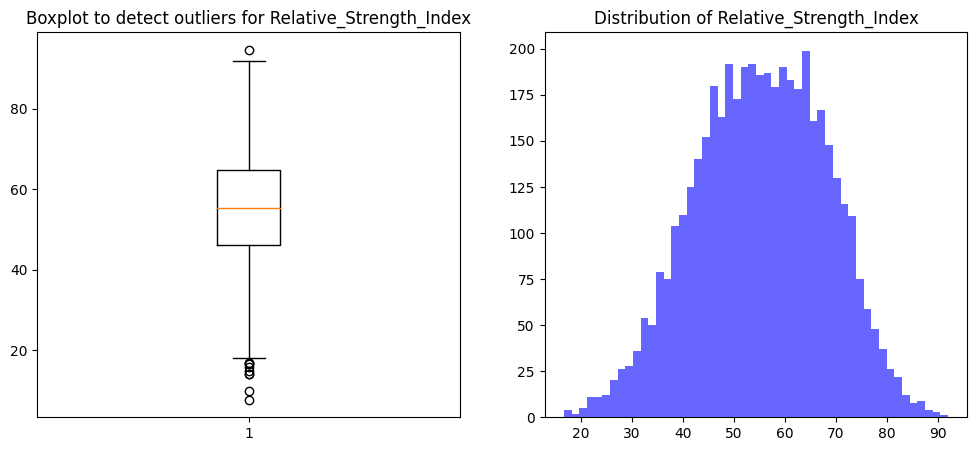

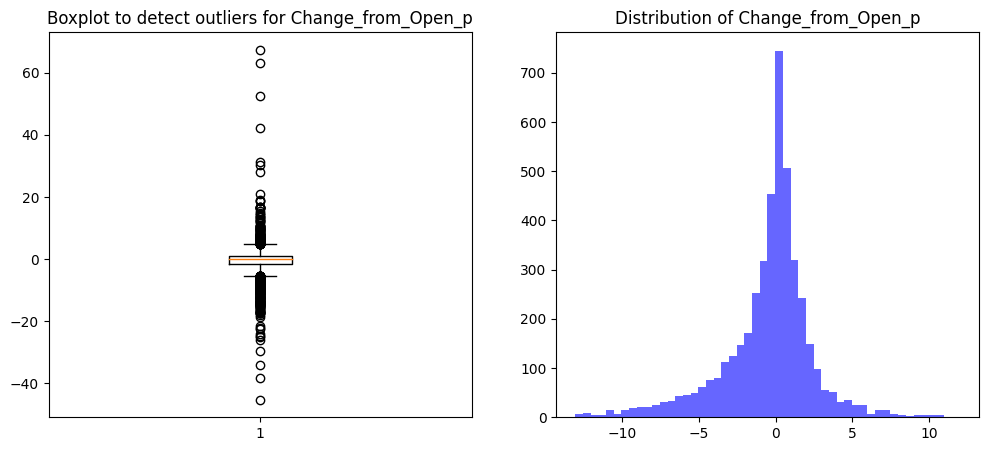

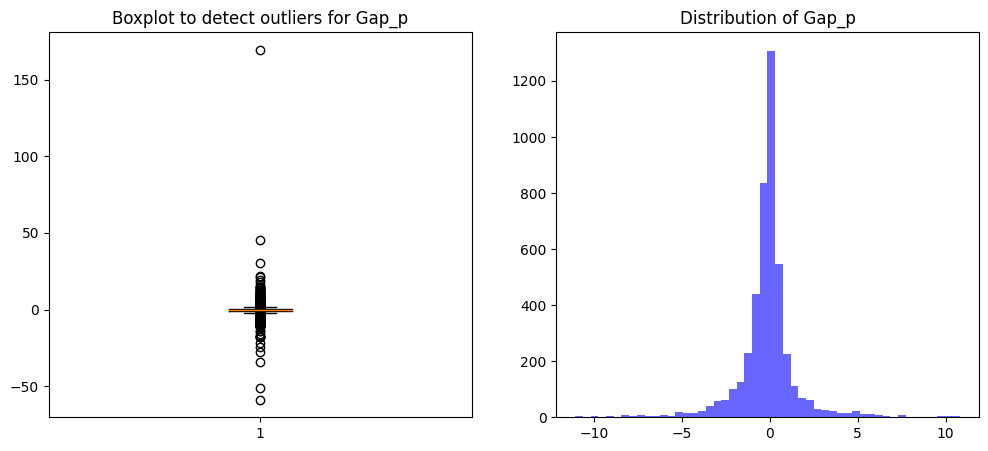

In [ ]:
outlier_handler.visualize_outliers_graphs()

Some columns have right skewed distribution, such as 'Market_Cap', 'Volume', etc. Some columns have almost normal distribution, such as 'Change_p', 'Simple_Moving_Average_50_p' etc.


Let's find important parameters for outliers describing, such as lower limit, upper limit, max, min, median, etc. values.

In [ ]:
out_df = outlier_handler.describe_outliers_df()
out_df

<ipython-input-30-64362d0fd290>:152: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ret_df = pd.concat([ret_df, df_new], ignore_index=True)
<ipython-input-30-64362d0fd290>:152: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ret_df = pd.concat([ret_df, df_new], ignore_index=True)
<ipython-input-30-64362d0fd290>:152: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ret_df = pd.concat([ret_df, df_new], ignore_index=True)
<ipython-input-30-64362d0fd290>:152: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool d

,lower_limit,upper_limit,max,min,median,mode,zero_presence,count,proportion
column,,,,,,,,,
Market_Cap,-229590490492.53,252758521982.26,2982570000000.00,290000.00,11584015744.87,1040000000.00,False,30,0.01
Price,-24109.67,24434.51,547380.00,0.02,162.42,0.50,False,1,0.00
Change_p,-14.51,13.00,110.65,-52.20,-0.75,0.00,True,51,0.01
Volume,-9245836.36,10492454.09,84063544.00,0.00,623308.87,0.00,True,47,0.01
Price_to_Sales,-4027.55,4112.15,89101.04,0.01,42.30,0.01,False,4,0.00
Price_to_Book,-2639.65,2685.24,51660.00,0.01,22.79,0.01,False,2,0.00
Price_to_Cash,-10421.30,10809.72,228645.80,0.01,194.21,0.01,False,11,0.00
Sales_Past_5_Years_p,-71893.26,72822.74,1629025.70,-73.75,464.74,0.00,True,1,0.00
Dividend_p,-8.03,10.39,80.69,0.00,1.18,0.00,True,53,0.01


Great, there are not many of outliers in all columns, less than 100, so now let's remove all of them

In [ ]:
outlier_handler.remove_outliers()
out_df = outlier_handler.describe_outliers_df()
out_df

<ipython-input-30-64362d0fd290>:152: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ret_df = pd.concat([ret_df, df_new], ignore_index=True)
<ipython-input-30-64362d0fd290>:152: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ret_df = pd.concat([ret_df, df_new], ignore_index=True)
<ipython-input-30-64362d0fd290>:152: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ret_df = pd.concat([ret_df, df_new], ignore_index=True)
<ipython-input-30-64362d0fd290>:152: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool d

,lower_limit,upper_limit,max,min,median,mode,zero_presence,count,proportion
column,,,,,,,,,
Market_Cap,-229590490492.53,252758521982.26,2982570000000.00,290000.00,11584015744.87,1040000000.00,False,0,0
Price,-24109.67,24434.51,547380.00,0.02,162.42,0.50,False,0,0
Change_p,-14.51,13.00,110.65,-52.20,-0.75,0.00,True,0,0
Volume,-9245836.36,10492454.09,84063544.00,0.00,623308.87,0.00,True,0,0
Price_to_Sales,-4027.55,4112.15,89101.04,0.01,42.30,0.01,False,0,0
Price_to_Book,-2639.65,2685.24,51660.00,0.01,22.79,0.01,False,0,0
Price_to_Cash,-10421.30,10809.72,228645.80,0.01,194.21,0.01,False,0,0
Sales_Past_5_Years_p,-71893.26,72822.74,1629025.70,-73.75,464.74,0.00,True,0,0
Dividend_p,-8.03,10.39,80.69,0.00,1.18,0.00,True,0,0


If distribution is right skewed I can log normalize it, but I can't do it if there are zero values in the distribution, so let's find all right skewed columns where there are not zero values.

In [ ]:
not_zero_df = out_df[~out_df.index.isin(out_df[out_df.zero_presence].index)]
not_zero_df

,lower_limit,upper_limit,max,min,median,mode,zero_presence,count,proportion
column,,,,,,,,,
Market_Cap,-229590490492.53,252758521982.26,2982570000000.00,290000.00,11584015744.87,1040000000.00,False,0,0
Price,-24109.67,24434.51,547380.00,0.02,162.42,0.50,False,0,0
Price_to_Sales,-4027.55,4112.15,89101.04,0.01,42.30,0.01,False,0,0
Price_to_Book,-2639.65,2685.24,51660.00,0.01,22.79,0.01,False,0,0
Price_to_Cash,-10421.30,10809.72,228645.80,0.01,194.21,0.01,False,0,0
Outstanding_Shares,-2095542555.33,2509041153.55,16740000000.00,460000.00,206749299.11,23000000.00,False,0,0
Float,-2034576793.98,2405028114.72,15940000000.00,110000.00,185225660.37,790000.00,False,0,0
Average_Volume,-11813739.23,14616106.84,121420000.00,380.00,1401183.81,1030000.00,False,0,0
Average_True_Range,-334.66,340.27,7609.37,0.01,2.80,0.06,False,0,0


In [ ]:
not_zero_df.index

Index(['Market_Cap', 'Price', 'Price_to_Sales', 'Price_to_Book',
       'Price_to_Cash', 'Outstanding_Shares', 'Float', 'Average_Volume',
       'Average_True_Range', 'Relative_Strength_Index'],
      dtype='object', name='column')

Let's visualize distribution again

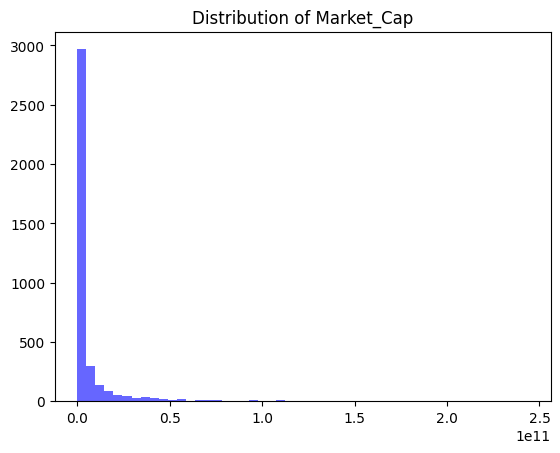

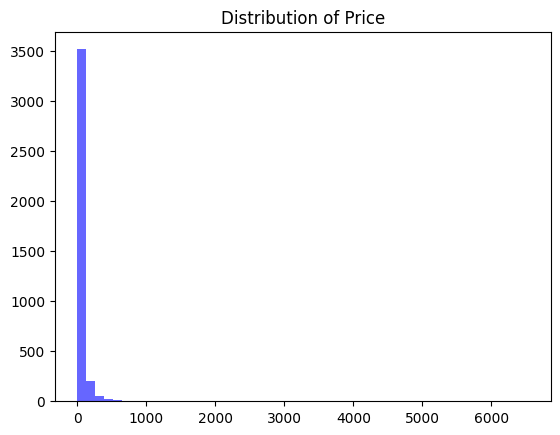

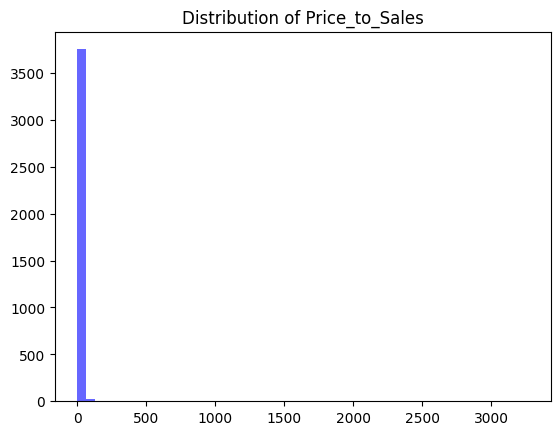

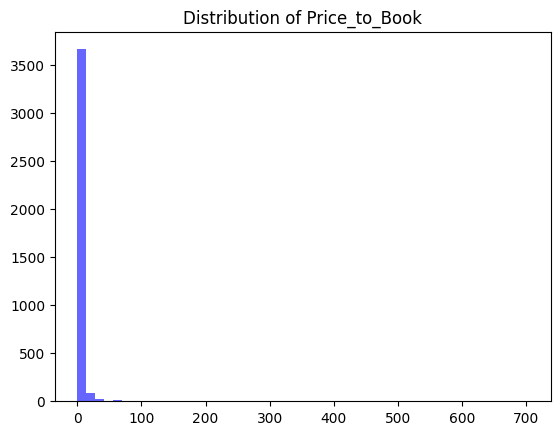

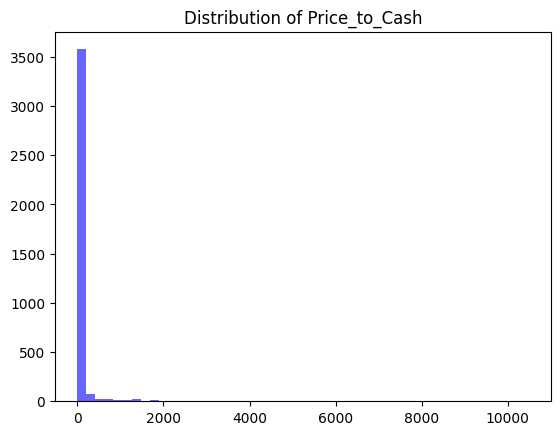

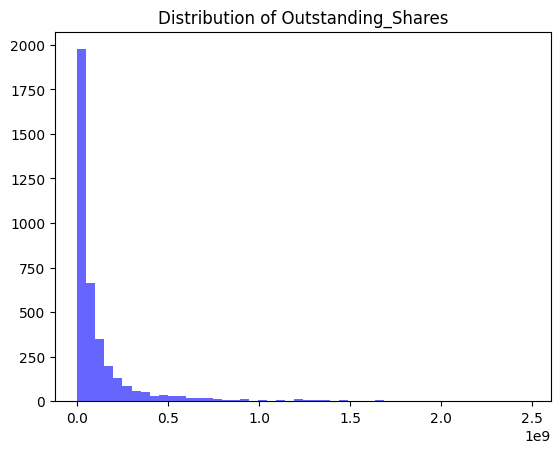

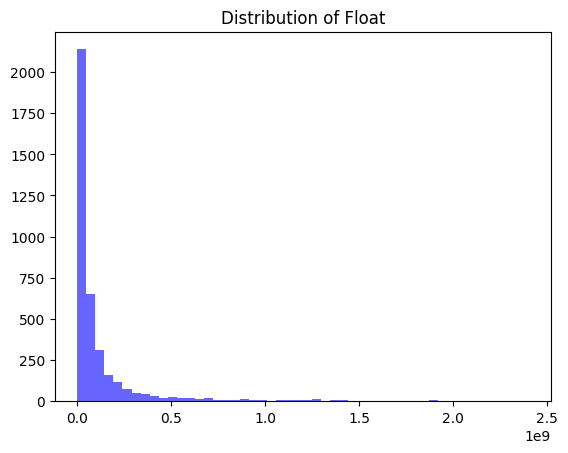

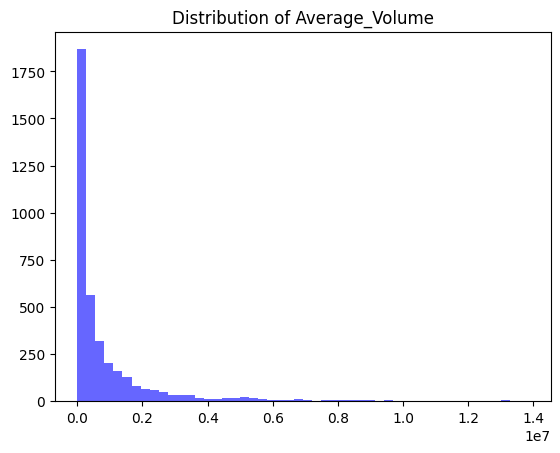

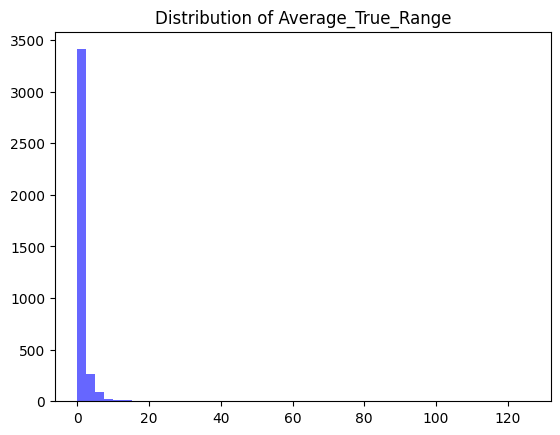

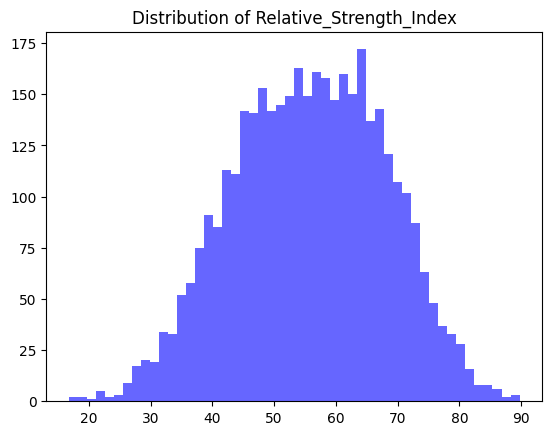

In [ ]:
outlier_handler.visualize_distributions(not_zero_df.index)

Every column except 'Relative_Strength_Index' can and should be log normalized

In [ ]:
not_norm = ['Relative_Strength_Index', 'Price']
norm_columns = [item for item in not_zero_df.index if item not in not_norm]
outlier_handler.log_normalize(norm_columns)

Other columns because of big difference between lower and upper limit should be stardardize, so let's do it.

In [ ]:
stand_df = out_df[out_df.index.isin(out_df[out_df.zero_presence].index)]
stand_ccolumns = [item for item in stand_df.index]

for column in not_norm:
  stand_ccolumns.append(column)

outlier_handler.z_score_standardize(stand_ccolumns)

In [ ]:
res_df = outlier_handler.get_result_df()
res_df

,Company,Sector,Industry,Country,Market_Cap,Price,Change_p,Volume,Price_to_Sales,Price_to_Book,Price_to_Cash,Sales_Past_5_Years_p,Dividend_p,Return_on_Assets_p,Return_on_Equity_p,Return_on_Investment_p,Current_Ratio,Long_Term_Debt_to_Equity,Operating_Margin_p,Outstanding_Shares,Float,Float_Short_p,Short_Ratio,Average_Volume,Performance_Week_p,Performance_Month_p,Performance_Quarter_p,Performance_Half_Year_p,Performance_Year_p,Performance_Year_to_Date_p,Relative_Volume,Beta,Average_True_Range,Simple_Moving_Average_20_p,Simple_Moving_Average_50_p,Simple_Moving_Average_200_p,Yearly_High_p,Yearly_Low_p,Relative_Strength_Index,Change_from_Open_p,Gap_p,Insider_Ownership_Categ,Insider_Transactions_Categ
0,Agilent Technologies Inc.,Healthcare,Diagnostics & Research,USA,24.36,4.86,0.94,0.16,1.71,1.87,3.17,-0.08,-0.17,0.78,0.52,0.36,-0.09,-0.17,0.08,19.49,19.49,-0.37,-0.38,14.57,0.14,0.73,0.75,0.48,-0.32,-0.29,-0.10,0.06,1.01,0.50,0.75,0.40,0.45,-0.22,1.14,0.53,0.28,0_25,-1_0
1,Alcoa Corp,Basic Materials,Aluminum,USA,22.22,3.22,0.09,1.45,-0.89,-0.01,1.43,-0.08,0.17,0.05,-0.10,0.04,-0.35,-0.19,0.08,18.99,18.99,0.82,-0.54,15.52,-0.99,-0.44,-0.40,-0.74,-0.99,-1.00,-0.20,1.91,0.00,-0.80,-0.59,-0.80,-0.98,-0.86,-1.12,0.41,-0.60,0_25,no_data
2,ATA Creativity Global ADR,Consumer Defensive,Education & Training Services,China,17.18,-0.13,4.06,-0.43,-0.08,0.68,1.14,1.27,-0.57,-0.06,-0.35,-0.22,-0.75,-0.29,0.07,17.08,15.99,-0.86,-0.95,8.52,0.33,-0.14,-0.88,-0.73,-0.84,-0.64,0.43,0.02,-2.41,-0.07,-0.86,-1.21,-1.25,-0.74,-0.55,2.37,3.19,no_data,no_data
3,Armada Acquisition Corp I,Financial,Shell Companies,USA,18.29,2.38,0.32,-0.43,-4.61,1.64,7.27,-0.09,-0.57,0.29,0.17,0.17,-0.80,-0.33,0.08,15.90,14.71,-0.86,-1.18,9.40,0.23,-0.47,0.28,0.27,0.30,0.18,-0.91,-1.52,-3.00,-0.20,-0.19,0.41,0.75,-0.40,0.15,-0.00,0.20,50_75,no_data
4,Aadi Bioscience Inc,Healthcare,Biotechnology,USA,18.60,1.58,-0.54,-0.40,1.64,0.02,0.01,0.12,-0.57,-1.26,-0.51,-0.42,0.97,-0.33,0.03,17.01,16.66,0.22,0.82,11.62,-0.52,0.07,-0.66,-1.03,-1.34,-1.38,0.05,-0.01,-1.20,-0.09,0.35,-0.74,-1.24,-0.38,-0.26,-0.75,1.09,25_50,-1_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4578,Zura Bio Ltd,Healthcare,Biotechnology,USA,18.98,1.41,1.02,-0.39,-4.61,1.08,0.59,-0.09,-0.57,0.41,0.22,0.26,0.88,-0.33,0.08,17.58,16.84,-0.66,-0.81,11.81,-1.18,-0.39,-1.57,-1.04,-1.19,-1.28,-0.27,-0.77,-0.99,-0.34,-1.39,-1.50,-2.19,-0.77,-0.86,3.48,0.08,50_75,no_data
4579,Zevia PBC,Consumer Defensive,Beverages - Non-Alcoholic,USA,18.41,0.68,-0.42,-0.40,-0.53,-0.06,0.91,-0.06,-0.57,-0.36,-0.09,-0.01,-0.16,-0.33,0.07,17.68,17.50,-0.42,0.77,11.60,-1.63,-0.91,-1.42,-1.78,-1.17,-1.22,0.09,-0.53,-1.83,-1.71,-0.88,-1.37,-1.28,-0.77,-1.31,-2.66,0.08,0_25,-1_0
4580,Zevra Therapeutics Inc,Healthcare,Biotechnology,USA,19.11,1.58,-1.58,-0.35,2.51,0.97,0.48,-0.08,-0.57,-0.97,-0.59,-0.22,0.93,-0.10,0.03,17.54,17.44,0.73,3.30,11.99,-0.43,0.52,-0.30,-0.20,0.21,0.18,0.03,1.10,-1.39,0.35,0.27,0.10,0.27,-0.41,-0.07,-1.12,-0.17,0_25,0_1
4582,Zurn Elkay Water Solutions Corp,Industrials,Pollution & Treatment Controls,USA,22.35,3.38,0.35,-0.04,1.22,1.16,3.39,-0.09,-0.14,0.45,0.27,0.25,0.06,-0.21,0.08,18.99,18.76,0.32,0.32,14.11,-0.03,-0.17,0.31,0.75,0.56,0.94,-0.35,0.24,-0.54,-0.26,0.18,0.81,1.04,0.29,0.03,0.47,-0.01,0_25,-1_0


Nice. Everything for creating predictive model is done.
But what else should I do? Of cource EDA and visualization! Everything will will be done in Power BI, and after that all insights will be writter beneath.

### **Insights after *Analyze stage* and results of EDA**

1. The sectors of the US economy that occupy the largest share are technology, financial companies, medicine and the consumer sector, obviously in terms of market capitalization in the same order, 13 trillion dollars of total capitalization - the technology sector, 7 trillion dollars - the financial sector, and 6 trillion dollars each - healthcare and consumer sector.


2. The largest number of companies are financial, followed by the medical, technology and consumer sectors.


3. The highest return on assets and capital among energy companies, followed immediately by financial companies, while the rest of the companies from the top-4 sectors, oddly enough, occupy the last places in terms of profitability. But in terms of sales, healthcare, technology and the consumer sector are in the top-4.


4. If we take dividends as a positive economic indicator, then again the shares of financial companies are the best. Despite the fact that technology companies have minimal dividends, they have the largest increase in value due to large sales (of services).


5. Now let's move directly to the share price. Financial companies are again the most stable, as can be seen from weekly, monthly, quarterly and annual indicators. If we look at the long term (that is, for a period of a year or more), then again financial, technology and consumer sector companies show the best economic results, and also, oddly enough, industrialists.


# Construct stage

In [ ]:
# For data modeling
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LinearRegression

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay
from statsmodels.formula.api import ols

# For saving models
import pickle

**Business need and modeling objective**

Analysis indicates that the largest sectors of US stock market are technology, finance, medicine and the consumer sector. Therefore, it is useful to be able to determine which sectors and companies will growth more than others using price raising as metric. So Nalchik Investments wants to build a machine learning model to help predict stock price by sectors.

**Modeling design and target variable**

The data dictionary shows that there is a column called 'Price' . This is a float value that indicates the price of one share of company. This will be the target variable. In other words, for each company, the model should predict the future price of one share.

This is a regression task because the model is predicting a float value.

**Modeling workow and model selection process**

Previous work with this data has revealed that there are ~4,000 companies in the sample. This is sucient to conduct a rigorous model validation
workow, broken into the following steps:

1. Split the data into train/test sets (70/30)
2. Fit models and tune hyperparameters on the training set
3. Assess the champion model's performance on the test set

In [ ]:
df1 = pd.concat([res_df, pd.get_dummies(res_df['Insider_Ownership_Categ'], prefix='IOC', drop_first=True)], axis=1)
df1 = pd.concat([df1, pd.get_dummies(res_df['Insider_Transactions_Categ'], prefix='ITC', drop_first=True)], axis=1)
df1.drop(columns=['Insider_Ownership_Categ', 'Insider_Transactions_Categ'], inplace=True)
df1.head()

,Company,Sector,Industry,Country,Market_Cap,Price,Change_p,Volume,Price_to_Sales,Price_to_Book,Price_to_Cash,Sales_Past_5_Years_p,Dividend_p,Return_on_Assets_p,Return_on_Equity_p,Return_on_Investment_p,Current_Ratio,Long_Term_Debt_to_Equity,Operating_Margin_p,Outstanding_Shares,Float,Float_Short_p,Short_Ratio,Average_Volume,Performance_Week_p,Performance_Month_p,Performance_Quarter_p,Performance_Half_Year_p,Performance_Year_p,Performance_Year_to_Date_p,Relative_Volume,Beta,Average_True_Range,Simple_Moving_Average_20_p,Simple_Moving_Average_50_p,Simple_Moving_Average_200_p,Yearly_High_p,Yearly_Low_p,Relative_Strength_Index,Change_from_Open_p,Gap_p,IOC_25_50,IOC_50_75,IOC_75_100,IOC_no_data,IOC_zero,ITC_0_1,ITC_1_2,ITC_2_3,ITC_3_4,ITC_4_5,ITC_no_data,ITC_zero
0,Agilent Technologies Inc.,Healthcare,Diagnostics & Research,USA,24.36,4.86,0.94,0.16,1.71,1.87,3.17,-0.08,-0.17,0.78,0.52,0.36,-0.09,-0.17,0.08,19.49,19.49,-0.37,-0.38,14.57,0.14,0.73,0.75,0.48,-0.32,-0.29,-0.10,0.06,1.01,0.50,0.75,0.40,0.45,-0.22,1.14,0.53,0.28,0,0,0,0,0,0,0,0,0,0,0,0
1,Alcoa Corp,Basic Materials,Aluminum,USA,22.22,3.22,0.09,1.45,-0.89,-0.01,1.43,-0.08,0.17,0.05,-0.10,0.04,-0.35,-0.19,0.08,18.99,18.99,0.82,-0.54,15.52,-0.99,-0.44,-0.40,-0.74,-0.99,-1.00,-0.20,1.91,0.00,-0.80,-0.59,-0.80,-0.98,-0.86,-1.12,0.41,-0.60,0,0,0,0,0,0,0,0,0,0,1,0
2,ATA Creativity Global ADR,Consumer Defensive,Education & Training Services,China,17.18,-0.13,4.06,-0.43,-0.08,0.68,1.14,1.27,-0.57,-0.06,-0.35,-0.22,-0.75,-0.29,0.07,17.08,15.99,-0.86,-0.95,8.52,0.33,-0.14,-0.88,-0.73,-0.84,-0.64,0.43,0.02,-2.41,-0.07,-0.86,-1.21,-1.25,-0.74,-0.55,2.37,3.19,0,0,0,1,0,0,0,0,0,0,1,0
3,Armada Acquisition Corp I,Financial,Shell Companies,USA,18.29,2.38,0.32,-0.43,-4.61,1.64,7.27,-0.09,-0.57,0.29,0.17,0.17,-0.80,-0.33,0.08,15.90,14.71,-0.86,-1.18,9.40,0.23,-0.47,0.28,0.27,0.30,0.18,-0.91,-1.52,-3.00,-0.20,-0.19,0.41,0.75,-0.40,0.15,-0.00,0.20,0,1,0,0,0,0,0,0,0,0,1,0
4,Aadi Bioscience Inc,Healthcare,Biotechnology,USA,18.60,1.58,-0.54,-0.40,1.64,0.02,0.01,0.12,-0.57,-1.26,-0.51,-0.42,0.97,-0.33,0.03,17.01,16.66,0.22,0.82,11.62,-0.52,0.07,-0.66,-1.03,-1.34,-1.38,0.05,-0.01,-1.20,-0.09,0.35,-0.74,-1.24,-0.38,-0.26,-0.75,1.09,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.shape

(3813, 53)

In [ ]:
X = df1.drop(columns=['Company', 'Sector', 'Industry', 'Country', 'Price'])
y = df1[['Price']]

Split data into training and testing sets, 70/30

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)

In [ ]:
# Display the model results.
model.intercept_

array([0.07531701])

In [ ]:
list(zip(X.columns, model.coef_[0].tolist()))

[('Market_Cap', 0.8767329138892709),
 ('Change_p', 0.005277112562736552),
 ('Volume', -0.00475722592432423),
 ('Price_to_Sales', -0.011647103518320018),
 ('Price_to_Book', 0.0016021617554328957),
 ('Price_to_Cash', 0.0025004386286009645),
 ('Sales_Past_5_Years_p', -0.0004137918027876391),
 ('Dividend_p', 0.0013947194435551884),
 ('Return_on_Assets_p', 0.010619653039586266),
 ('Return_on_Equity_p', 0.004883618113048149),
 ('Return_on_Investment_p', -0.004165228593190549),
 ('Current_Ratio', -0.005950059167409719),
 ('Long_Term_Debt_to_Equity', -0.00041205117576351017),
 ('Operating_Margin_p', -0.0005264943711645062),
 ('Outstanding_Shares', -0.16857842722743957),
 ('Float', -0.6968956045010116),
 ('Float_Short_p', -0.003663042712627192),
 ('Short_Ratio', -0.006710042934058774),
 ('Average_Volume', 0.006007958528435723),
 ('Performance_Week_p', 0.005135099753996561),
 ('Performance_Month_p', 0.0025449769243950835),
 ('Performance_Quarter_p', 0.0043090255931217125),
 ('Performance_Half_Ye

And let's  make prediction

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[ 0.32516793],
       [-1.47751764],
       [ 0.03988762],
       ...,
       [ 2.0292353 ],
       [ 2.1489866 ],
       [ 2.251504  ]])

In [ ]:
y_test

,Price
2989,0.28
4481,-1.47
2530,0.15
3760,3.18
3384,1.53
...,...
2079,4.67
1419,3.75
4202,1.98
4367,2.16


Now let's check the model

In [ ]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', format(mae, '.10f'))
print('Mean Square Error:', format(mse, '.10f'))
print('Root Mean Square Error:', format(r2, '.10f'))

Mean Absolute Error: 0.0862917677
Mean Square Error: 0.0197894357
Root Mean Square Error: 0.1406749291


MSE is very small, so that means that model is good enough.

Now, before using OLS let's drop string columns

In [ ]:
df2 = res_df.drop(columns=['Company', 'Sector', 'Industry', 'Country'])

In [ ]:
df_for_ols = df2.drop(columns=['Price', 'Insider_Ownership_Categ', 'Insider_Transactions_Categ'])
ols_x_columns = ' + '.join(df_for_ols.columns)
ols_x_columns

'Market_Cap + Change_p + Volume + Price_to_Sales + Price_to_Book + Price_to_Cash + Sales_Past_5_Years_p + Dividend_p + Return_on_Assets_p + Return_on_Equity_p + Return_on_Investment_p + Current_Ratio + Long_Term_Debt_to_Equity + Operating_Margin_p + Outstanding_Shares + Float + Float_Short_p + Short_Ratio + Average_Volume + Performance_Week_p + Performance_Month_p + Performance_Quarter_p + Performance_Half_Year_p + Performance_Year_p + Performance_Year_to_Date_p + Relative_Volume + Beta + Average_True_Range + Simple_Moving_Average_20_p + Simple_Moving_Average_50_p + Simple_Moving_Average_200_p + Yearly_High_p + Yearly_Low_p + Relative_Strength_Index + Change_from_Open_p + Gap_p'

In [ ]:
ols_formula = f'Price ~ C(Insider_Ownership_Categ) + C(Insider_Transactions_Categ) + {ols_x_columns}'

# Create an OLS model.
OLS = ols(formula = ols_formula, data = df2)

# Fit the model.
model = OLS.fit()

In [ ]:
# Save the results summary.
model_results = model.summary()

# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.113e+04
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:04:00   Log-Likelihood:                 2026.8
No. Observations:                3813   AIC:                            -3956.
Df Residuals:                    3764   BIC:                            -3650.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.0532      0.047      1.119      0.263      -0.040       0.146
C(Insider_Ownership_Categ)[T.25_50]         -0.2601      0.007    -36.855      0.000      -0.274      -0.246
C(Insider_Ownership_Categ)[T.50_75]         -0.6149      0.011    -56.897      0.000      -0.636      -0.594
C(Insider_Ownership_Categ)[T.75_100]        -1.3666      0.019    -73.344      0.000      -1.403      -1.330
C(Insider_Ownership_Categ)[T.no_data]       -0.1570      0.018     -8.671      0.000      -0.192      -0.121
C(Insider_Ownership_Categ)[T.zero]           0.0435      0.021      2.086      0.037       0.003       0.084
C(Insider_Transactions_Categ)[T.0_1]        -0.0006      0.008     -0.072      0.943      -0.017       0.016
C(Insider_Transactions_Categ)[T.1_2]        -0.0161      0.044     -0.367      0.714      -0.102       0.070
C(Insider_Transactions_Categ)[T.2_3]         0.0523      0.083      0.628      0.530      -0.111       0.216
C(Insider_Transactions_Categ)[T.3_4]         0.0255      0.083      0.306      0.760      -0.138       0.189
C(Insider_Transactions_Categ)[T.4_5]        -0.0896      0.146     -0.615      0.538      -0.375       0.196
C(Insider_Transactions_Categ)[T.no_data]     0.0040      0.006      0.640      0.522      -0.008       0.016
C(Insider_Transactions_Categ)[T.zero]       -0.0245      0.009     -2.821      0.005      -0.041      -0.007
Market_Cap                                   0.8847      0.006    156.021      0.000       0.874       0.896
Change_p                                     0.0036      0.004      0.988      0.323      -0.004       0.011
Volume                                      -0.0038      0.003     -1.306      0.192      -0.010       0.002
Price_to_Sales                              -0.0110      0.001     -8.165      0.000      -0.014      -0.008
Price_to_Book                                0.0033      0.003      1.168      0.243      -0.002       0.009
Price_to_Cash                                0.0024      0.001      2.513      0.012       0.001       0.004
Sales_Past_5_Years_p                        -0.0007      0.002     -0.286      0.775      -0.005       0.004
Dividend_p                                   0.0007      0.003      0.265      0.791      -0.005       0.006
Return_on_Assets_p                           0.0069      0.004      1.539      0.124      -0.002       0.016
Return_on_Equity_p                           0.0018      0.004      0.522      0.602      -0.005       0.009
Return_on_Investment_p                      -0.0011      0.003     -0.340      0.734      -0.007       0.005
Current_Ratio                               -0.0068      0.003     -2.614      0.009      -0.012      -0.002
Long_Term_Debt_to_Equity       

### **Insights after *Construct stage* and results of modeling**

We will focus on R-squared, which tells us how much variation in body mass (g) is explained by the model. An R-squared of 0.993 is fairly high, and this means that 85% of the variation in body mass (g) is explained by the model.